# CHURN PREDICTION PROJECT

In [114]:
import pandas as pd
data = pd.read_csv('churn_prediction.csv')
data.head()

customer_id  vintage  age gender  dependents     occupation    city  \
0            1     2101   66   Male         0.0  self_employed   187.0   
1            2     2348   35   Male         0.0  self_employed     NaN   
2            4     2194   31   Male         0.0       salaried   146.0   
3            5     2329   90    NaN         NaN  self_employed  1020.0   
4            6     1579   42   Male         2.0  self_employed  1494.0   

   customer_nw_category  branch_code  current_balance  ...  \
0                     2          755          1458.71  ...   
1                     2         3214          5390.37  ...   
2                     2           41          3913.16  ...   
3                     2          582          2291.91  ...   
4                     3          388           927.72  ...   

   average_monthly_balance_prevQ  average_monthly_balance_prevQ2  \
0                        1458.71                         1449.07   
1                        7799.26                        12419.41   
2                        4910.17                         2815.94   
3                        2084.54                         1006.54   
4                        1643.31                         1871.12   

   current_month_credit  previous_month_credit  current_month_debit  \
0                  0.20                   0.20                 0.20   
1                  0.56                   0.56              5486.27   
2                  0.61                   0.61              6046.73   
3                  0.47                   0.47                 0.47   
4                  0.33                 714.61               588.62   

   previous_month_debit  current_month_balance  previous_month_balance  churn  \
0                  0.20                1458.71                 1458.71      0   
1                100.56                6496.78                 8787.61      0   
2                259.23                5006.28                 5070.14      0   
3               2143.33                2291.91                 1669.79      1   
4               1538.06                1157.15                 1677.16      1   

   last_transaction  
0        2019-05-21  
1        2019-11-01  
2               NaT  
3        2019-08-06  
4        2019-11-03  

[5 rows x 21 columns]

In [115]:
data.shape

(28382, 21)

In [116]:
data.describe()

customer_id       vintage           age    dependents          city  \
count  28382.000000  28382.000000  28382.000000  25919.000000  27579.000000   
mean   15143.508667   2091.144105     48.208336      0.347236    796.109576   
std     8746.454456    272.676775     17.807163      0.997661    432.872102   
min        1.000000     73.000000      1.000000      0.000000      0.000000   
25%     7557.250000   1958.000000     36.000000      0.000000    409.000000   
50%    15150.500000   2154.000000     46.000000      0.000000    834.000000   
75%    22706.750000   2292.000000     60.000000      0.000000   1096.000000   
max    30301.000000   2476.000000     90.000000     52.000000   1649.000000   

       customer_nw_category   branch_code  current_balance  \
count          28382.000000  28382.000000     2.838200e+04   
mean               2.225530    925.975019     7.380552e+03   
std                0.660443    937.799129     4.259871e+04   
min                1.000000      1.000000    -5.503960e+03   
25%                2.000000    176.000000     1.784470e+03   
50%                2.000000    572.000000     3.281255e+03   
75%                3.000000   1440.000000     6.635820e+03   
max                3.000000   4782.000000     5.905904e+06   

       previous_month_end_balance  average_monthly_balance_prevQ  \
count                2.838200e+04                   2.838200e+04   
mean                 7.495771e+03                   7.496780e+03   
std                  4.252935e+04                   4.172622e+04   
min                 -3.149570e+03                   1.428690e+03   
25%                  1.906000e+03                   2.180945e+03   
50%                  3.379915e+03                   3.542865e+03   
75%                  6.656535e+03                   6.666887e+03   
max                  5.740439e+06                   5.700290e+06   

       average_monthly_balance_prevQ2  current_month_credit  \
count                    2.838200e+04          2.838200e+04   
mean                     7.124209e+03          3.433252e+03   
std                      4.457581e+04          7.707145e+04   
min                     -1.650610e+04          1.000000e-02   
25%                      1.832507e+03          3.100000e-01   
50%                      3.359600e+03          6.100000e-01   
75%                      6.517960e+03          7.072725e+02   
max                      5.010170e+06          1.226985e+07   

       previous_month_credit  current_month_debit  previous_month_debit  \
count           2.838200e+04         2.838200e+04          2.838200e+04   
mean            3.261694e+03         3.658745e+03          3.339761e+03   
std             2.968889e+04         5.198542e+04          2.430111e+04   
min             1.000000e-02         1.000000e-02          1.000000e-02   
25%             3.300000e-01         4.100000e-01          4.100000e-01   
50%             6.300000e-01         9.193000e+01          1.099600e+02   
75%             7.492350e+02         1.360435e+03          1.357553e+03   
max             2.361808e+06         7.637857e+06          1.414168e+06   

       current_month_balance  previous_month_balance         churn  
count           2.838200e+04            2.838200e+04  28382.000000  
mean            7.451133e+03            7.495177e+03      0.185329  
std             4.203394e+04            4.243198e+04      0.388571  
min            -3.374180e+03           -5.171920e+03      0.000000  
25%             1.996765e+03            2.074407e+03      0.000000  
50%             3.447995e+03            3.465235e+03      0.000000  
75%             6.667958e+03            6.654693e+03      0.000000  
max             5.778185e+06            5.720144e+06      1.000000

In [117]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [118]:
data.info()
#Total 28382 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [119]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

In [120]:
#Clean according to datatype , start with INT64

data.dtypes[data.dtypes == 'int64']

customer_id             int64
vintage                 int64
age                     int64
customer_nw_category    int64
branch_code             int64
churn                   int64
dtype: object

In [121]:
len(data['customer_id'].unique())
#No redundancy in customer id (28382 different values for 28382 rows == No use) , we can drop this feature

28382

In [122]:
#Age and Vintage are numbers, leave as int64


#Convert customer_networth_category to categorical(category)
data['customer_nw_category'] = data['customer_nw_category'].astype('category')


len(data['branch_code'].unique()) # == 3182
#Different branch_code represents different Branch Name (to Categorical)
data['branch_code'] = data['branch_code'].astype('category')


#Churn is either 0 or 1 ,so category
data['churn'] = data['churn'].astype('category')

In [123]:
data.head()

customer_id  vintage  age gender  dependents     occupation    city  \
0            1     2101   66   Male         0.0  self_employed   187.0   
1            2     2348   35   Male         0.0  self_employed     NaN   
2            4     2194   31   Male         0.0       salaried   146.0   
3            5     2329   90    NaN         NaN  self_employed  1020.0   
4            6     1579   42   Male         2.0  self_employed  1494.0   

  customer_nw_category branch_code  current_balance  ...  \
0                    2         755          1458.71  ...   
1                    2        3214          5390.37  ...   
2                    2          41          3913.16  ...   
3                    2         582          2291.91  ...   
4                    3         388           927.72  ...   

   average_monthly_balance_prevQ  average_monthly_balance_prevQ2  \
0                        1458.71                         1449.07   
1                        7799.26                        12419.41   
2                        4910.17                         2815.94   
3                        2084.54                         1006.54   
4                        1643.31                         1871.12   

   current_month_credit  previous_month_credit  current_month_debit  \
0                  0.20                   0.20                 0.20   
1                  0.56                   0.56              5486.27   
2                  0.61                   0.61              6046.73   
3                  0.47                   0.47                 0.47   
4                  0.33                 714.61               588.62   

   previous_month_debit  current_month_balance  previous_month_balance  churn  \
0                  0.20                1458.71                 1458.71      0   
1                100.56                6496.78                 8787.61      0   
2                259.23                5006.28                 5070.14      0   
3               2143.33                2291.91                 1669.79      1   
4               1538.06                1157.15                 1677.16      1   

  last_transaction  
0       2019-05-21  
1       2019-11-01  
2              NaT  
3       2019-08-06  
4       2019-11-03  

[5 rows x 21 columns]

In [124]:
#FLOAT64

data.dtypes[data.dtypes == 'float64']

dependents                        float64
city                              float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

In [125]:
data['dependents'].unique() #Convert to int
data['dependents'] = data['dependents'].astype('Int64')
data['dependents'].unique()

<IntegerArray>
[0, <NA>, 2, 3, 1, 7, 4, 6, 5, 9, 52, 36, 50, 8, 25, 32]
Length: 16, dtype: Int64

In [126]:
len(data['city'].unique()) #city float represents Categorical
data['city'] = data['city'].astype('category')

In [127]:
data[['city','dependents']].dtypes

city          category
dependents       Int64
dtype: object

In [128]:
#OBJECT

data.dtypes[data.dtypes == 'object']

gender              object
occupation          object
last_transaction    object
dtype: object

In [129]:
#Pandas cannot process object datatypes
#Convert gender , occupation to category

data['gender'] = data['gender'].astype('category')
data['occupation'] = data['occupation'].astype('category')

In [130]:
#To canvert last_transaction ,get all information from it and delete column

date = pd.DatetimeIndex(data['last_transaction'])

#Draw (dayofyear , weekofyear , monthofyear , dayofweek)
data['doy_ls_trans'] = date.dayofyear
data['woy_ls_trans'] = date.weekofyear
data['moy_ls_trans'] = date.month
data['dow_ls_trans'] = date.dayofweek

C:\Users\mgowt\AppData\Local\Temp\ipykernel_8104\3644194586.py:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data['woy_ls_trans'] = date.weekofyear


In [131]:
data[['last_transaction','doy_ls_trans' , 'woy_ls_trans' , 'moy_ls_trans' , 'dow_ls_trans']].head(10)

last_transaction  doy_ls_trans  woy_ls_trans  moy_ls_trans  dow_ls_trans
0       2019-05-21         141.0          21.0           5.0           1.0
1       2019-11-01         305.0          44.0          11.0           4.0
2              NaT           NaN           NaN           NaN           NaN
3       2019-08-06         218.0          32.0           8.0           1.0
4       2019-11-03         307.0          44.0          11.0           6.0
5       2019-11-01         305.0          44.0          11.0           4.0
6       2019-09-24         267.0          39.0           9.0           1.0
7       2019-07-12         193.0          28.0           7.0           4.0
8       2019-12-12         346.0          50.0          12.0           3.0
9       2019-12-31         365.0           1.0          12.0           1.0

In [132]:
data = data.drop(columns='last_transaction')

In [133]:
data.head()

customer_id  vintage  age gender  dependents     occupation    city  \
0            1     2101   66   Male           0  self_employed   187.0   
1            2     2348   35   Male           0  self_employed     NaN   
2            4     2194   31   Male           0       salaried   146.0   
3            5     2329   90    NaN        <NA>  self_employed  1020.0   
4            6     1579   42   Male           2  self_employed  1494.0   

  customer_nw_category branch_code  current_balance  ...  \
0                    2         755          1458.71  ...   
1                    2        3214          5390.37  ...   
2                    2          41          3913.16  ...   
3                    2         582          2291.91  ...   
4                    3         388           927.72  ...   

   previous_month_credit  current_month_debit  previous_month_debit  \
0                   0.20                 0.20                  0.20   
1                   0.56              5486.27                100.56   
2                   0.61              6046.73                259.23   
3                   0.47                 0.47               2143.33   
4                 714.61               588.62               1538.06   

   current_month_balance  previous_month_balance  churn  doy_ls_trans  \
0                1458.71                 1458.71      0         141.0   
1                6496.78                 8787.61      0         305.0   
2                5006.28                 5070.14      0           NaN   
3                2291.91                 1669.79      1         218.0   
4                1157.15                 1677.16      1         307.0   

   woy_ls_trans  moy_ls_trans dow_ls_trans  
0          21.0           5.0          1.0  
1          44.0          11.0          4.0  
2           NaN           NaN          NaN  
3          32.0           8.0          1.0  
4          44.0          11.0          6.0  

[5 rows x 24 columns]

In [134]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                           Int64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
doy_ls_trans                       float64
woy_ls_trans                       float64
moy_ls_trans                       float64
dow_ls_tran

# UNIVARIATE ANALYSIS

In [135]:
#Numerical Variables

data.select_dtypes(include=['int64','Int64','float64']).dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_trans                      float64
woy_ls_trans                      float64
moy_ls_trans                      float64
dow_ls_trans                      float64
dtype: object

In [136]:
#Segregate Variables

cust_details = ['customer_id','age','vintage']
current_month = ['current_balance','current_month_credit','current_month_balance','current_month_debit']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
last_transaction = ['doy_ls_trans','woy_ls_trans','moy_ls_trans','dow_ls_trans']

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(x = points,y = [0,0], color = 'black', label = "std_dev")
    sns.scatterplot(x = [mini,maxi],y = [0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x = [mean],y = [0], color = 'red', label = "mean")
    sns.scatterplot(x = [median],y = [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

C:\Users\mgowt\AppData\Local\Temp\ipykernel_8104\1863627338.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], shade=True)
C:\Users\mgowt\AppData\Local\Temp\ipykernel_8104\1863627338.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], shade=True)
C:\Users\mgowt\AppData\Local\Temp\ipykernel_8104\1863627338.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], shade=True)


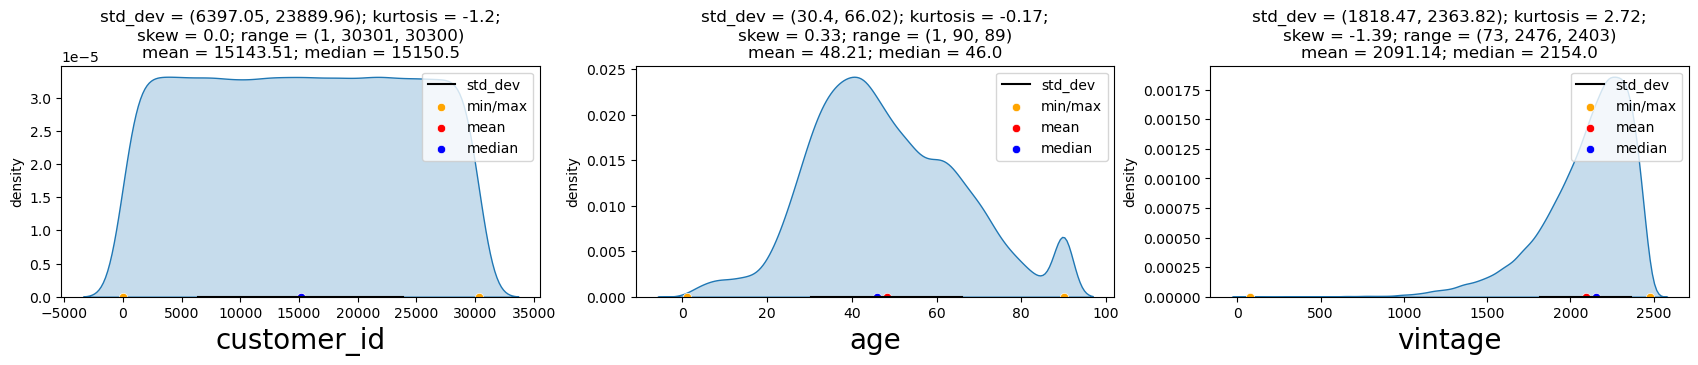

In [138]:
UVA_numeric(data,cust_details)

In [139]:
data = data.drop(columns='customer_id')

In [140]:
#Insights from above Graph
''''''

''

C:\Users\mgowt\AppData\Local\Temp\ipykernel_8104\1863627338.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], shade=True)
C:\Users\mgowt\AppData\Local\Temp\ipykernel_8104\1863627338.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], shade=True)
C:\Users\mgowt\AppData\Local\Temp\ipykernel_8104\1863627338.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], shade=True)
C:\Users\mgowt\AppData\Local\Temp\ipykernel_8104\1863627338.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  s

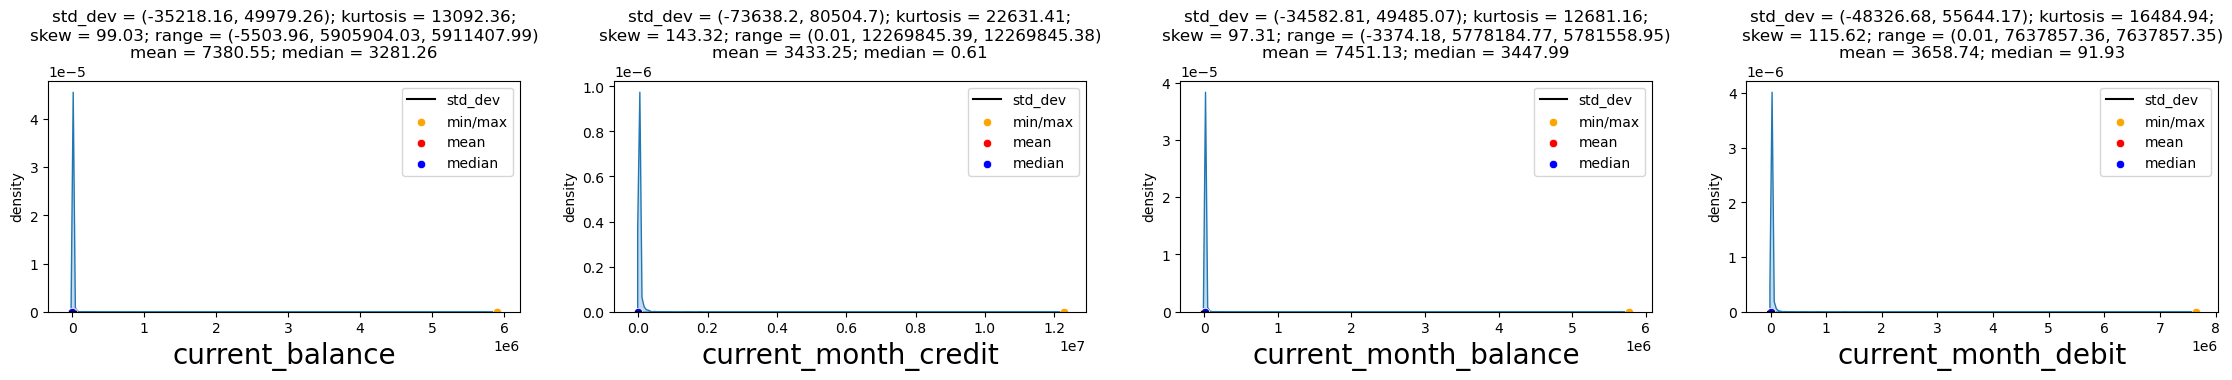

In [141]:
#For Current month UVA

UVA_numeric(data,current_month)

In [142]:
#High cahnces of having outliers, remove them first.
# Let us assume values greater then 3 * std be the outliers

cm_data = data[current_month]
len(cm_data)

28382

In [143]:
cm_data = cm_data[cm_data['current_balance'] < 3 * cm_data['current_balance'].std()]
len(cm_data)

28283

In [144]:
28382 - 28283
#99 rows have been deleted (outliers of current_balance)

99

In [145]:
cm_data = cm_data[cm_data['current_month_credit'] < 3 * cm_data['current_month_credit'].std()]
len(cm_data)

28251

In [146]:
cm_data = cm_data[cm_data['current_month_debit'] < 3*cm_data['current_month_debit'].std()]
cm_data = cm_data[cm_data['current_month_balance'] < 3*cm_data['current_month_balance'].std()]
len(cm_data)

27113

C:\Users\mgowt\AppData\Local\Temp\ipykernel_8104\1863627338.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], shade=True)
C:\Users\mgowt\AppData\Local\Temp\ipykernel_8104\1863627338.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], shade=True)
C:\Users\mgowt\AppData\Local\Temp\ipykernel_8104\1863627338.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], shade=True)
C:\Users\mgowt\AppData\Local\Temp\ipykernel_8104\1863627338.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  s

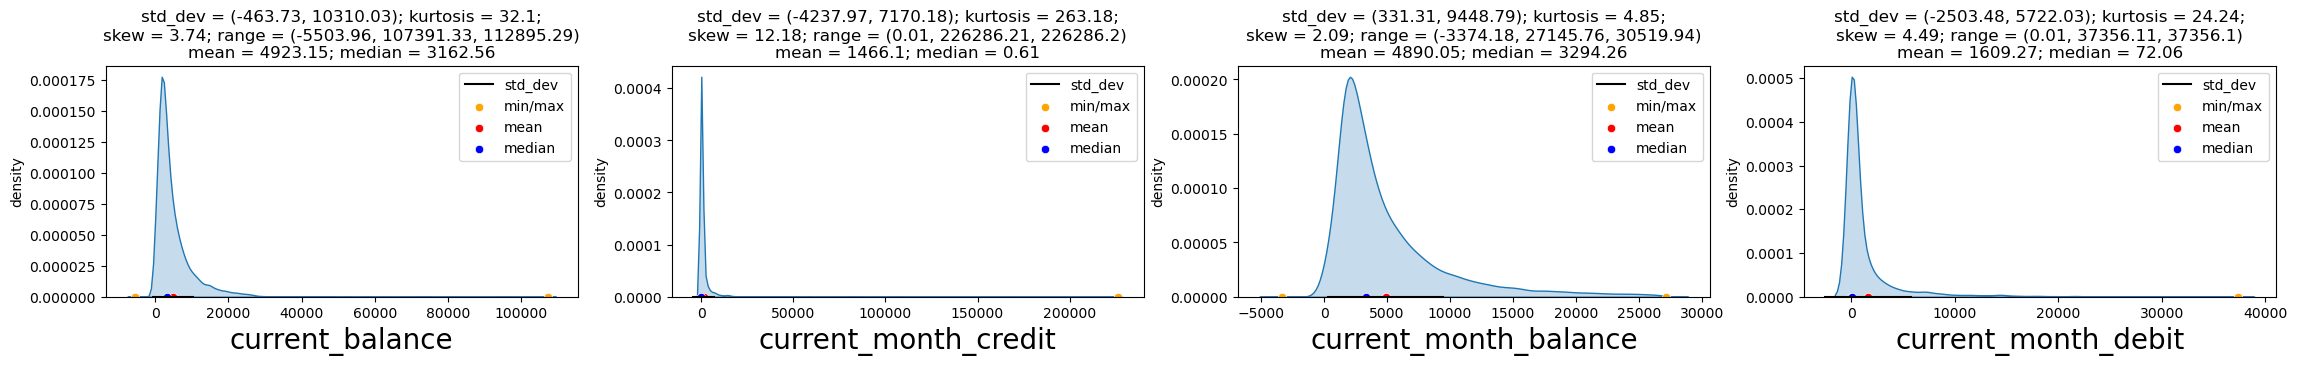

In [147]:
#Now plot the graph with UVA for insightfull graph

UVA_numeric(cm_data , current_month)

#Still they are skewed

C:\Users\mgowt\AppData\Local\Temp\ipykernel_8104\1863627338.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], shade=True)
C:\Users\mgowt\AppData\Local\Temp\ipykernel_8104\1863627338.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], shade=True)
C:\Users\mgowt\AppData\Local\Temp\ipykernel_8104\1863627338.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], shade=True)
C:\Users\mgowt\AppData\Local\Temp\ipykernel_8104\1863627338.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  s

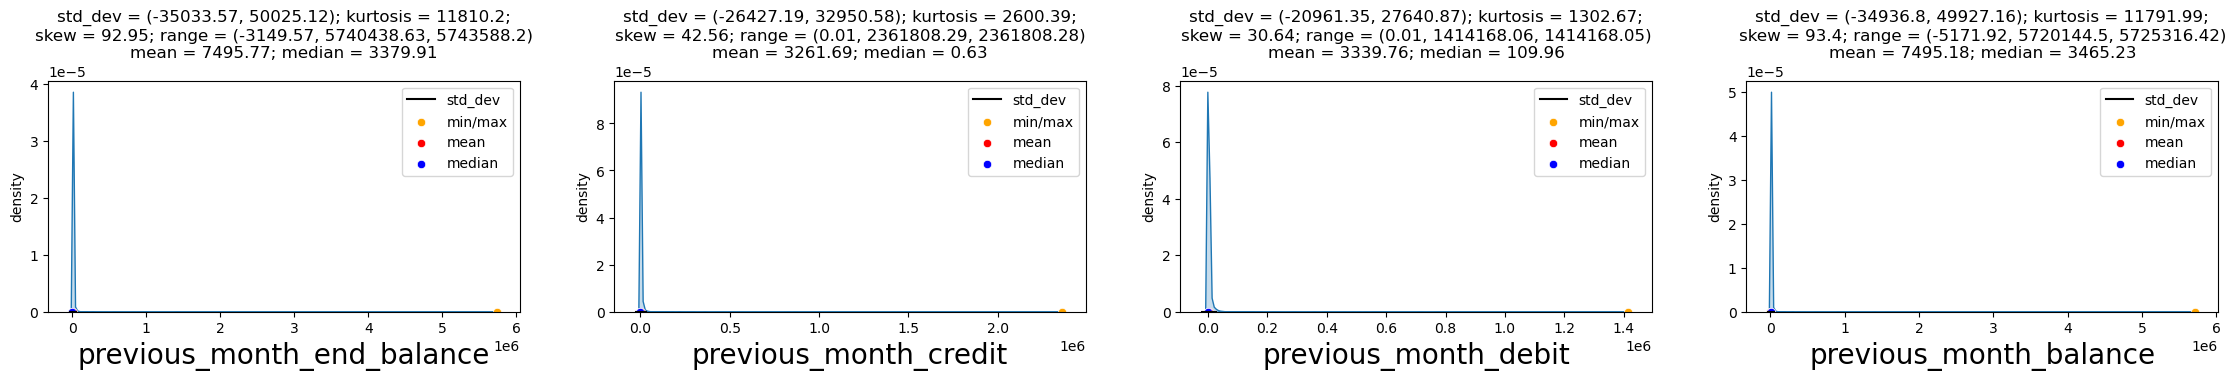

In [148]:
#Previous month UVA

UVA_numeric(data , previous_month)
#most of the customers do less transaction according to the graph

C:\Users\mgowt\AppData\Local\Temp\ipykernel_8104\1863627338.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], shade=True)
C:\Users\mgowt\AppData\Local\Temp\ipykernel_8104\1863627338.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], shade=True)


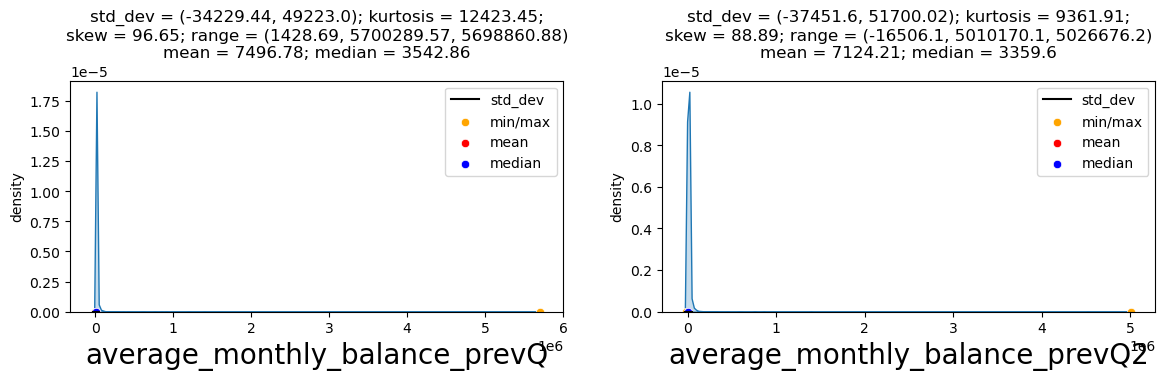

In [149]:
#PREVIOUS QUARTER UVA

UVA_numeric(data , previous_quarters)

C:\Users\mgowt\AppData\Local\Temp\ipykernel_8104\1863627338.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], shade=True)
C:\Users\mgowt\AppData\Local\Temp\ipykernel_8104\1863627338.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], shade=True)
C:\Users\mgowt\AppData\Local\Temp\ipykernel_8104\1863627338.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], shade=True)
C:\Users\mgowt\AppData\Local\Temp\ipykernel_8104\1863627338.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  s

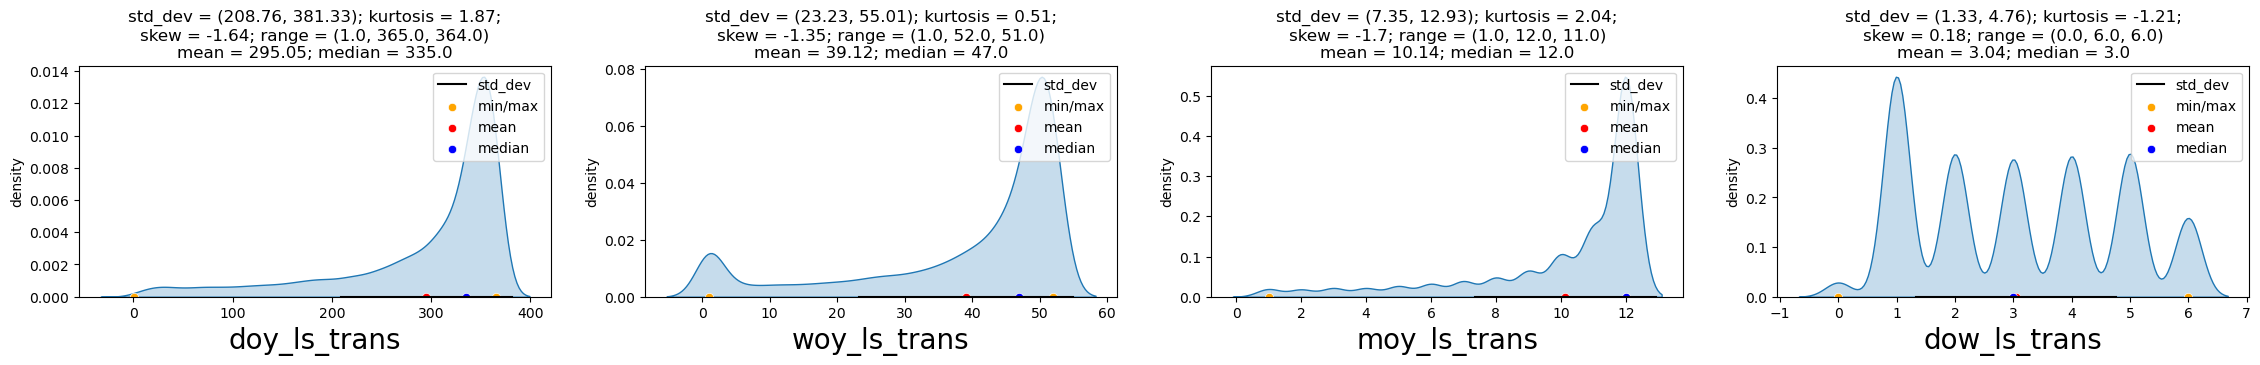

In [150]:
#TRANSACTION DATE UVA

UVA_numeric(data , last_transaction)

In [151]:
'''
doy - DAY OF YEAR -- Most of the transactions are happening in the end of the year 
dow - DAY OF WEEK -- Most transactions are happening in Tuesday
'''

'\ndoy - DAY OF YEAR -- Most of the transactions are happening in the end of the year \ndow - DAY OF WEEK -- Most transactions are happening in Tuesday\n'

# UVA CATEGORICAL VARIABLE

In [152]:
data.dtypes[data.dtypes =='category']

gender                  category
occupation              category
city                    category
customer_nw_category    category
branch_code             category
churn                   category
dtype: object

In [153]:
customer_info = ['gender','occupation','customer_nw_category']
account_info = ['city','branch_code']
churn = ['churn']

In [154]:
norm_count = data['gender'].value_counts(normalize = True)

n_uni_gen = data['gender'].nunique()
n_uni_occ = data['occupation'].nunique()
norm_count , n_uni_gen , n_uni_occ

(Male      0.594034
 Female    0.405966
 Name: gender, dtype: float64,
 2,
 5)

In [155]:
#UVA through Grouping the DATA in Variables

def UVA_category(data,var_group):
    size = len(var_group)
    plt.figure(figsize = (7*size,5), dpi = 100)
    
    for j,i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize = True)
        n_uni = data[i].nunique()
        
        #Plot BAR graph
        plt.subplot(1,size,j+1)
        sns.barplot(x = norm_count,y = norm_count.index , order = norm_count.index)
        plt.xlabel('fraction/percent', fontsize = 20)
        plt.ylabel('{}'.format(i), fontsize = 20)
        plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

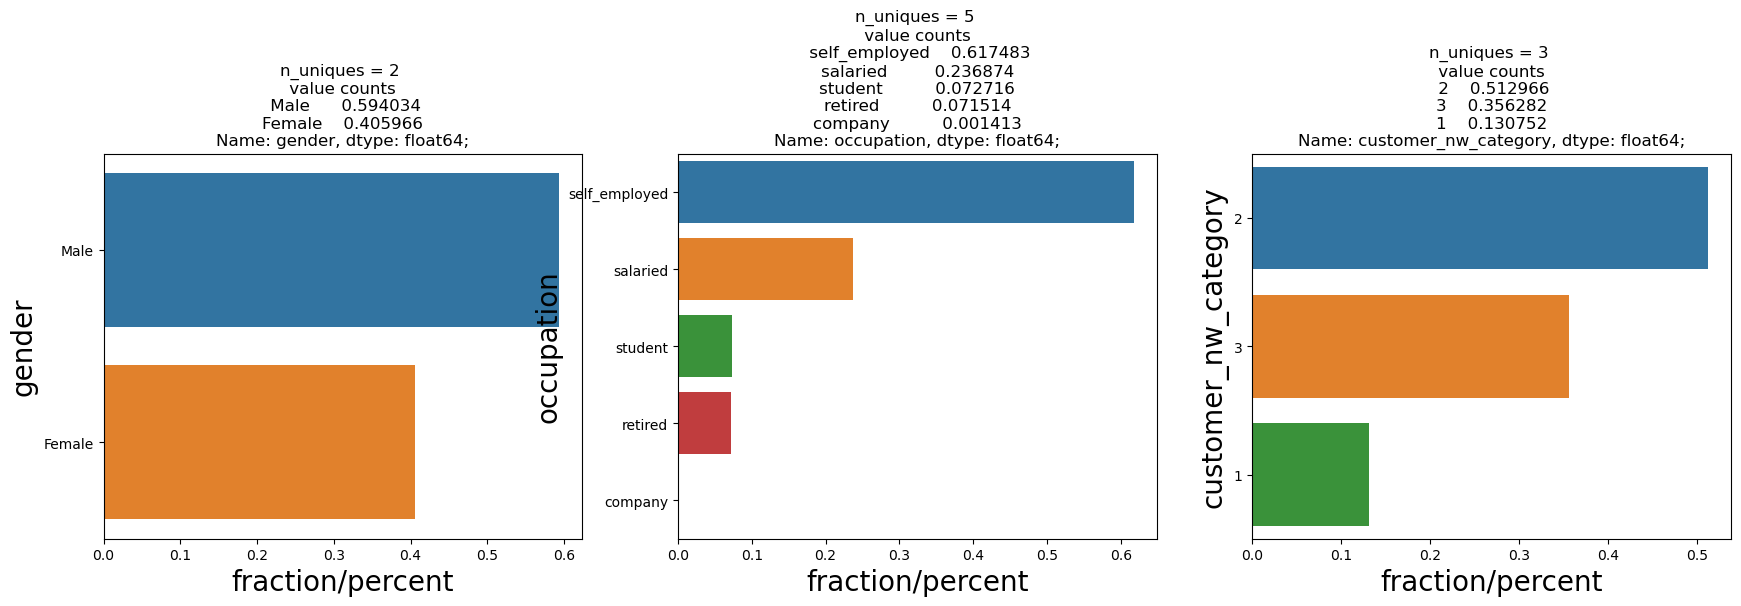

In [156]:
UVA_category(data,customer_info)

In [157]:
'''
GENDER -- 60% people are male
OCCUPATION -- 61% people are SELF EMPLOYED
NW_CATEGORY -- 50% people are 2nd network people
'''

'\nGENDER -- 60% people are male\nOCCUPATION -- 61% people are SELF EMPLOYED\nNW_CATEGORY -- 50% people are 2nd network people\n'

In [158]:
#Account info

account_info


['city', 'branch_code']

In [159]:
count_val = data['city'].value_counts(normalize = True)
count_val

1020.0    0.126147
1096.0    0.073099
409.0     0.048370
146.0     0.046811
834.0     0.041263
            ...   
882.0     0.000036
888.0     0.000036
890.0     0.000036
896.0     0.000036
1649.0    0.000036
Name: city, Length: 1604, dtype: float64

(0.0, 0.02)

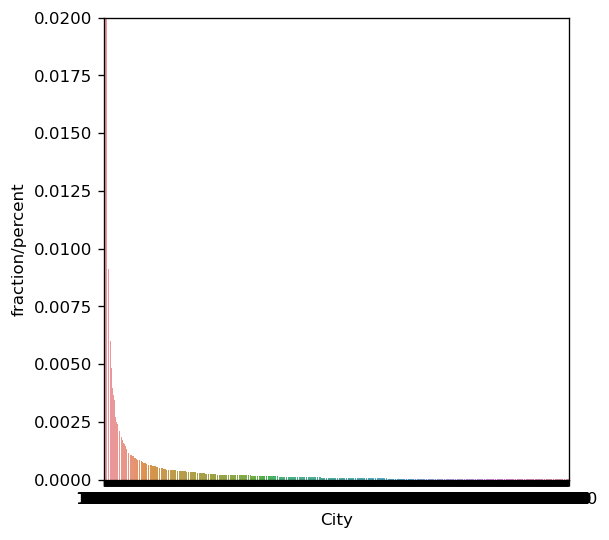

In [160]:
plt.figure(figsize = (5,5), dpi = 120)
city_count = data['city'].value_counts(normalize=True)
sns.barplot(x = city_count.index,y = city_count , order = city_count.index)
plt.xlabel('City')
plt.ylabel('fraction/percent')
plt.ylim(0,0.02)

Text(0, 0.5, 'fraction/percent')

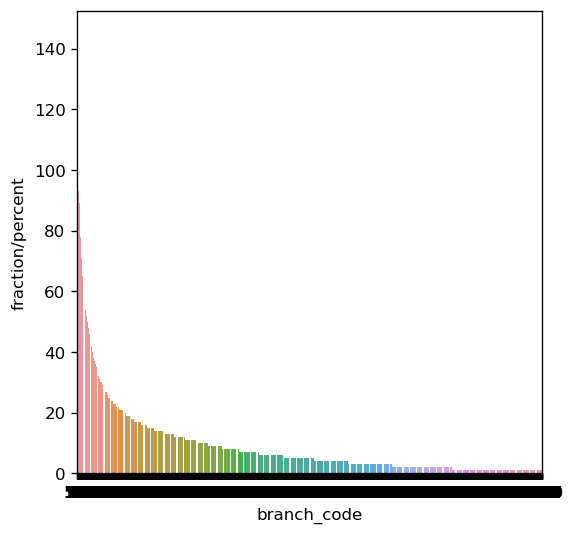

In [161]:

plt.figure(figsize = (5,5), dpi = 120)
branch_count = data['branch_code'].value_counts()
sns.barplot(x = branch_count.index,y = branch_count , order = branch_count.index)
plt.xlabel('branch_code')
plt.ylabel('fraction/percent')

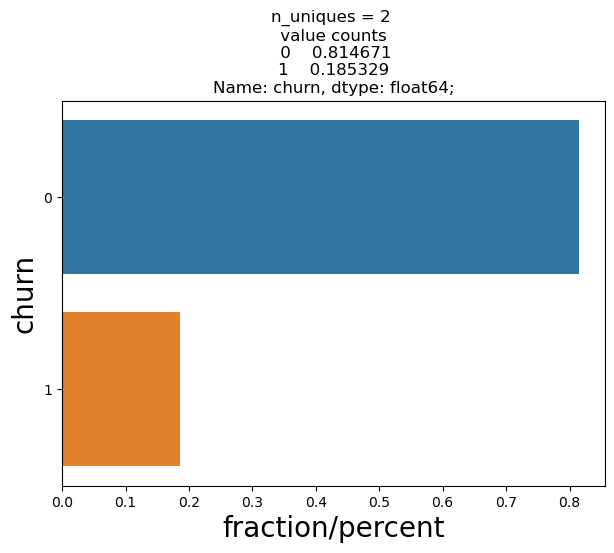

In [162]:
#CHURN

UVA_category(data,churn)

In [163]:
#Only around 20% people are got the churn

# WE UNDERSTOOD ABOUT THE DATA, NOW TIME FOR DATE CLEANING

In [164]:
#Checking for NULL values

data.isnull().sum()

vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
doy_ls_trans                      3223
woy_ls_trans                      3223
moy_ls_trans                      3223
dow_ls_trans                      3223
dtype: int64

**Things to investigate further down:**
*    Gender: Do the customers with missing gender values have some common behaviour in-
  * churn: do missing values have any relation with churn?

* Dependents:
 * Missing values might be similar to zero dependents
 * churn: do missing values have any relation with churn?

* Occupation:
 * Do missing values have similar behaviour to any other occupation
 * do they have some relation with churn?

* city:
  * the respective cities can be found using branch_code

* last_transaction:
  * checking their previous month and current month and previous_quarter activity might give insight on their last transaction.

* For almost all the above:

  * vintage: might be recording errors from same period of joining
  * branch_code: might be recording error from certain branch


In [165]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)

  #looping for each variable
  for j,i in enumerate(var_group):

    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

    else:
      # replacing outliers with max/min whisker
        data2 = data[var_group][:]
        data2[i][data2[i]>whis_high] = whis_high+1
        data2[i][data2[i]<whis_low] = whis_low-1

      # plotting without outliers
        plt.subplot(1,size,j+1)
        sns.boxplot(data2[i], orient="v")
        plt.ylabel('{}'.format(i))
        plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

In [166]:
#The above function Displays the BOXPLOT with and without OUTLIERS

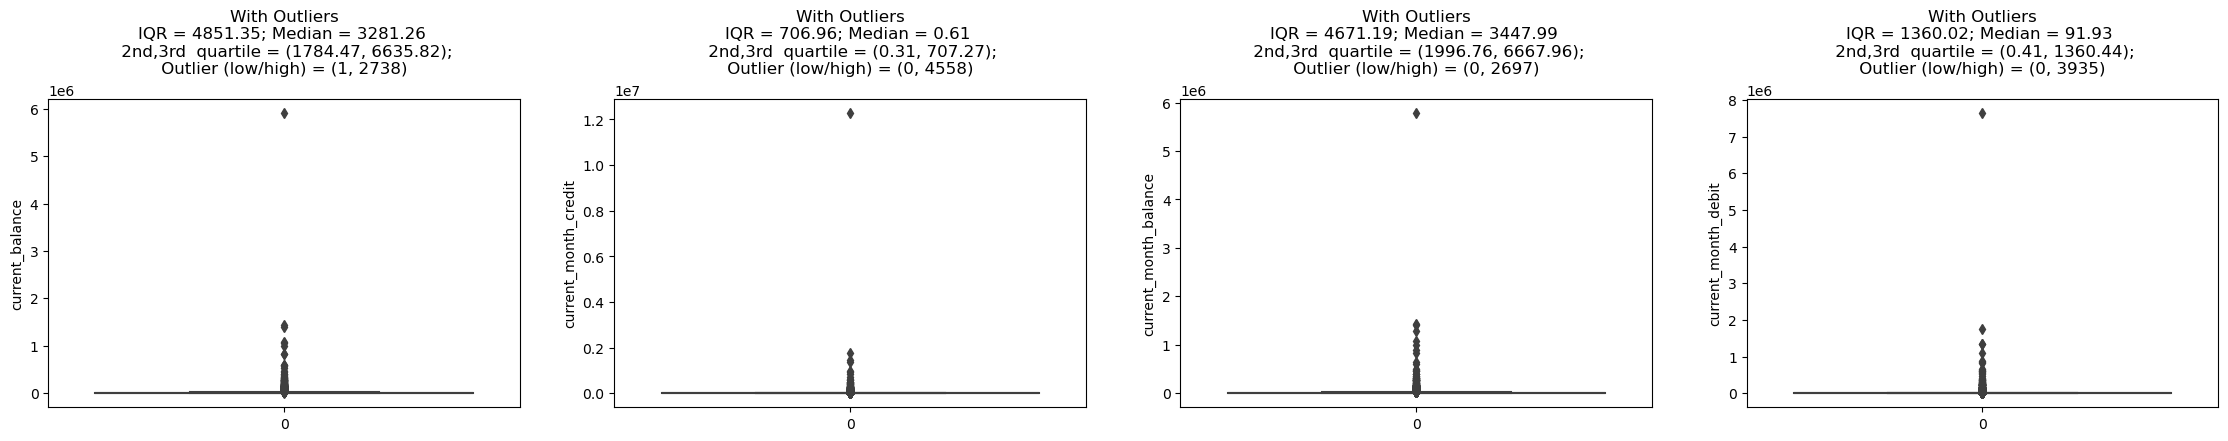

In [167]:
UVA_outlier(data,current_month,)
#BOXPLOT with outlier

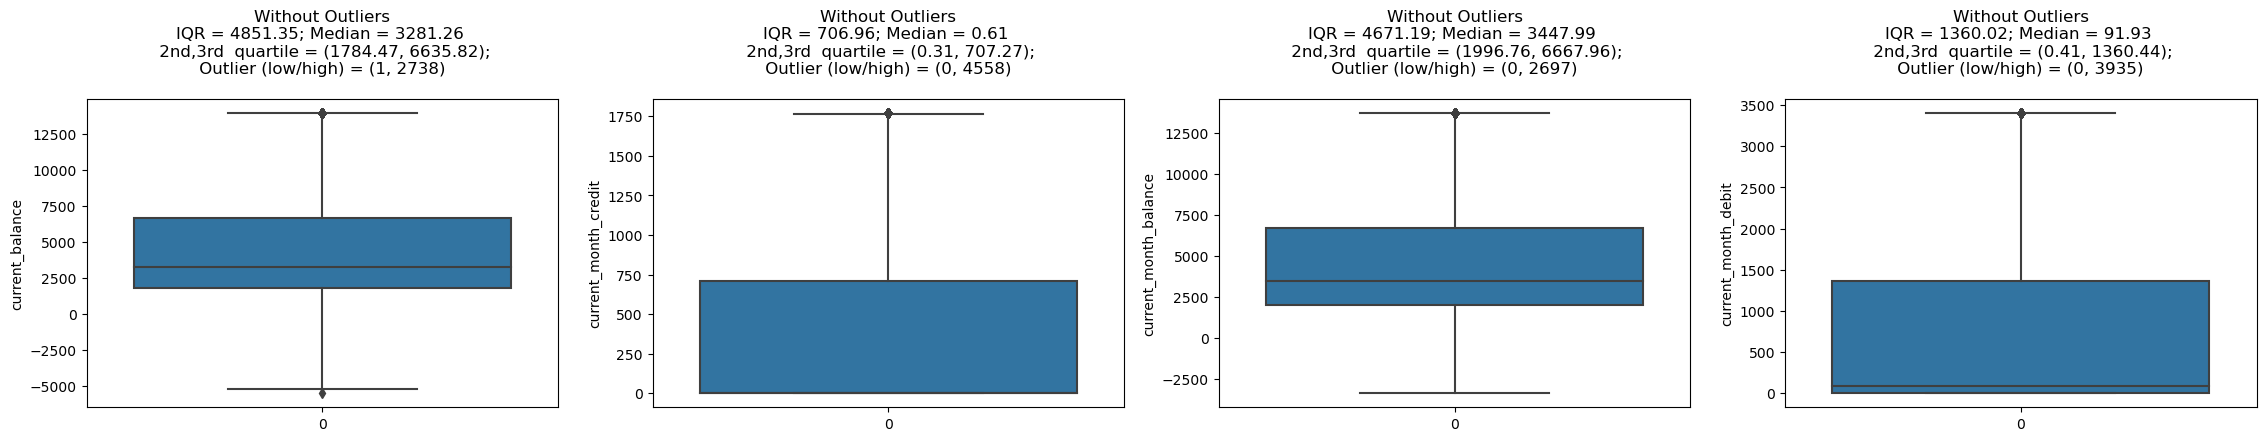

In [168]:
UVA_outlier(data, current_month, include_outlier=False)

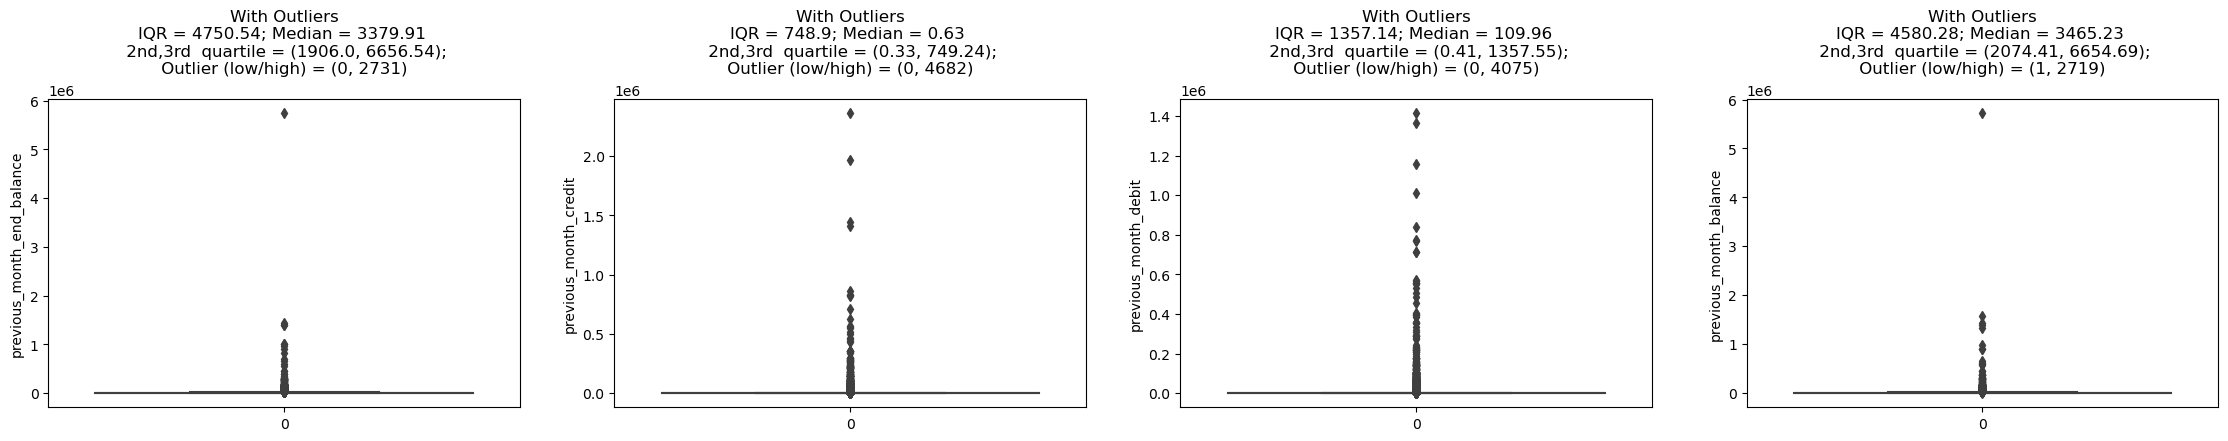

In [169]:
UVA_outlier(data , previous_month,)

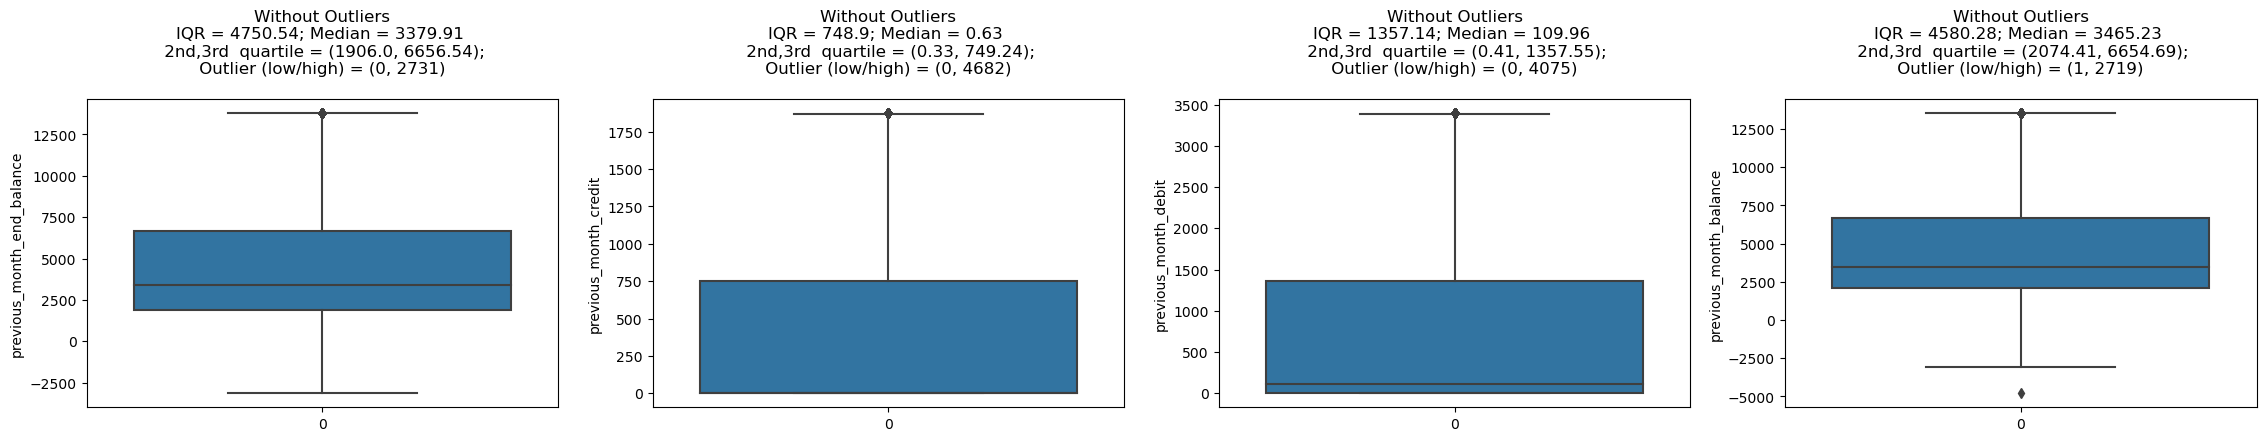

In [170]:
#Previous month boxplot without OUTLIERs
UVA_outlier(data , previous_month, include_outlier = False)

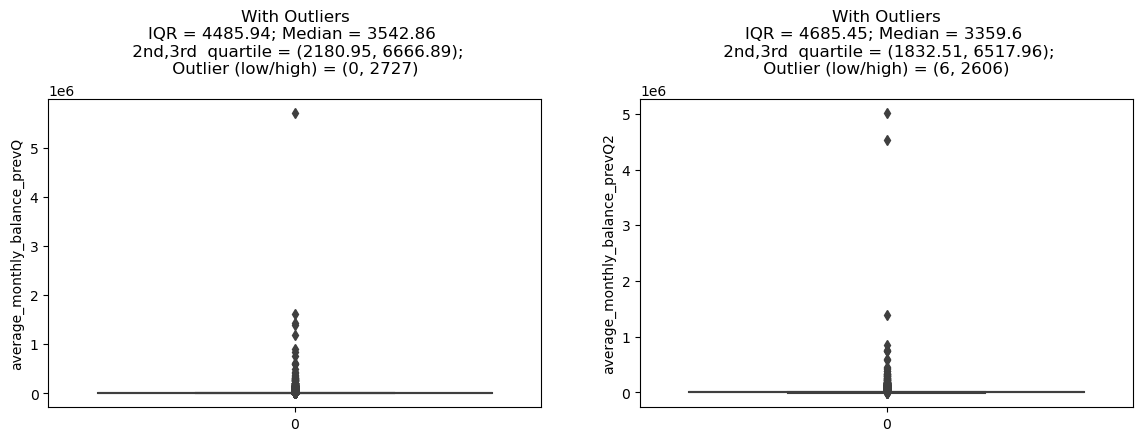

In [171]:
UVA_outlier(data , previous_quarters,)

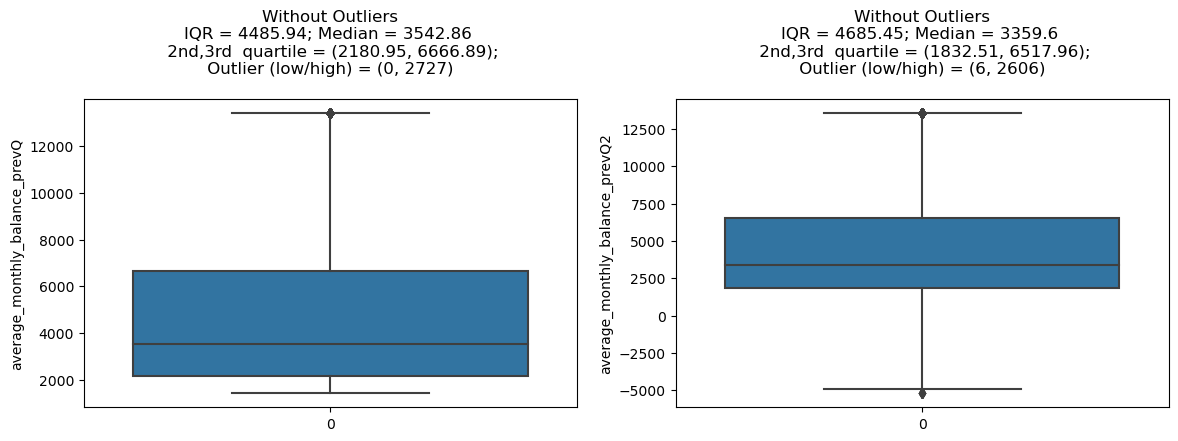

In [172]:
UVA_outlier(data, previous_quarters , include_outlier = False)

# BI-VARIATE ANALYSIS : NUMERICAL - NUMERICAL

In [173]:
NUMERICAL = data.select_dtypes(include = ['int64','Int64','float64'])[:]
NUMERICAL.dtypes

vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_trans                      float64
woy_ls_trans                      float64
moy_ls_trans                      float64
dow_ls_trans                      float64
dtype: object

In [174]:
#Correlation without NULL values

correlation = NUMERICAL.dropna().corr()
correlation

vintage       age  dependents  \
vintage                         1.000000  0.003170    0.005109   
age                             0.003170  1.000000   -0.003809   
dependents                      0.005109 -0.003809    1.000000   
current_balance                -0.007223  0.058925   -0.004554   
previous_month_end_balance     -0.008001  0.062775   -0.000826   
average_monthly_balance_prevQ  -0.010858  0.070903    0.000121   
average_monthly_balance_prevQ2 -0.003824  0.081361    0.002584   
current_month_credit           -0.004821  0.023921    0.002188   
previous_month_credit          -0.000410  0.027678    0.022772   
current_month_debit            -0.004899  0.025366    0.006784   
previous_month_debit           -0.007777  0.027717    0.029073   
current_month_balance          -0.008703  0.063120   -0.001859   
previous_month_balance         -0.010439  0.067712    0.000241   
doy_ls_trans                   -0.000680  0.010754    0.079740   
woy_ls_trans                   -0.010040  0.000501    0.034460   
moy_ls_trans                   -0.001359  0.011970    0.077978   
dow_ls_trans                   -0.009683 -0.020895   -0.001702   

                                current_balance  previous_month_end_balance  \
vintage                               -0.007223                   -0.008001   
age                                    0.058925                    0.062775   
dependents                            -0.004554                   -0.000826   
current_balance                        1.000000                    0.809257   
previous_month_end_balance             0.809257                    1.000000   
average_monthly_balance_prevQ          0.857204                    0.908053   
average_monthly_balance_prevQ2         0.584156                    0.661439   
current_month_credit                   0.053329                    0.051080   
previous_month_credit                  0.101495                    0.195149   
current_month_debit                    0.075149                    0.100379   
previous_month_debit                   0.151771                    0.192376   
current_month_balance                  0.940234                    0.910206   
previous_month_balance                 0.812295                    0.912269   
doy_ls_trans                           0.035242                    0.024130   
woy_ls_trans                          -0.008980                    0.000946   
moy_ls_trans                           0.033127                    0.023485   
dow_ls_trans                          -0.000315                    0.002033   

                                average_monthly_balance_prevQ  \
vintage                                             -0.010858   
age                                                  0.070903   
dependents                                           0.000121   
current_balance                                      0.857204   
previous_month_end_balance                           0.908053   
average_monthly_balance_prevQ                        1.000000   
average_monthly_balance_prevQ2                       0.731953   
current_month_credit                                 0.051294   
previous_month_credit                                0.138967   
current_month_debit                                  0.091491   
previous_month_debit                                 0.187226   
current_month_balance                                0.920943   
previous_month_balance                               0.983797   
doy_ls_trans                                         0.021103   
woy_ls_trans                                        -0.000577   
moy_ls_trans                                         0.020949   
dow_ls_trans                                         0.000647   

                                average_monthly_balance_prevQ2  \
vintage                                              -0.003824   
age                                                   0.081361   
dependents                                          

<Axes: >

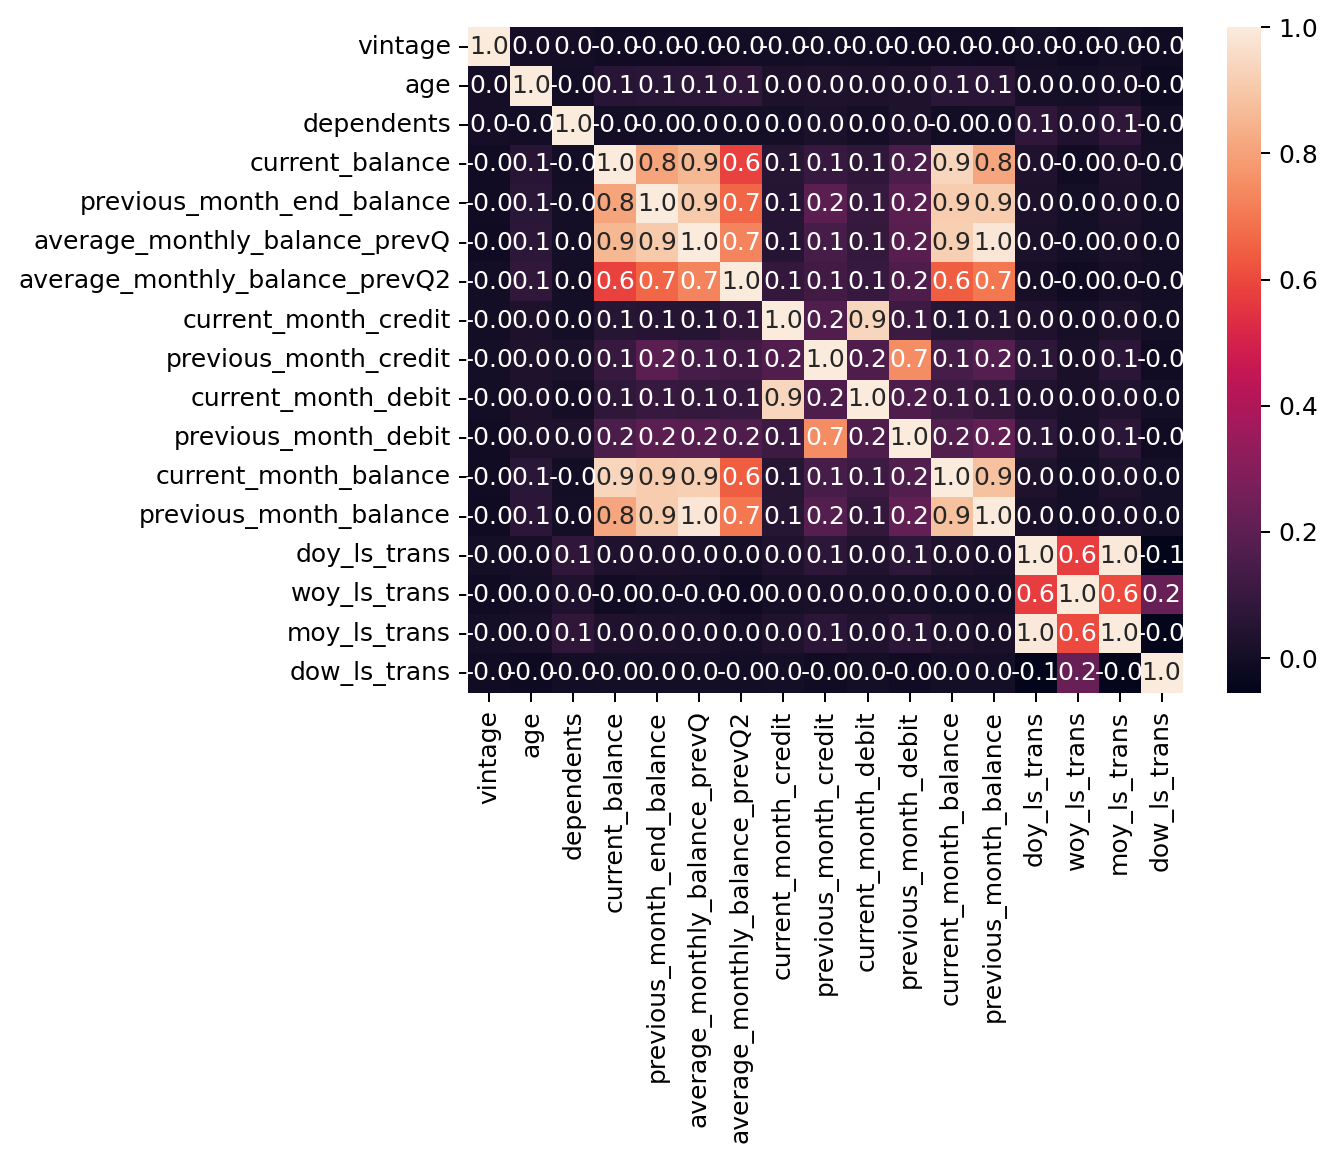

In [175]:
plt.figure(dpi = 180)
sns.heatmap(correlation,annot=True,fmt = '.1f')

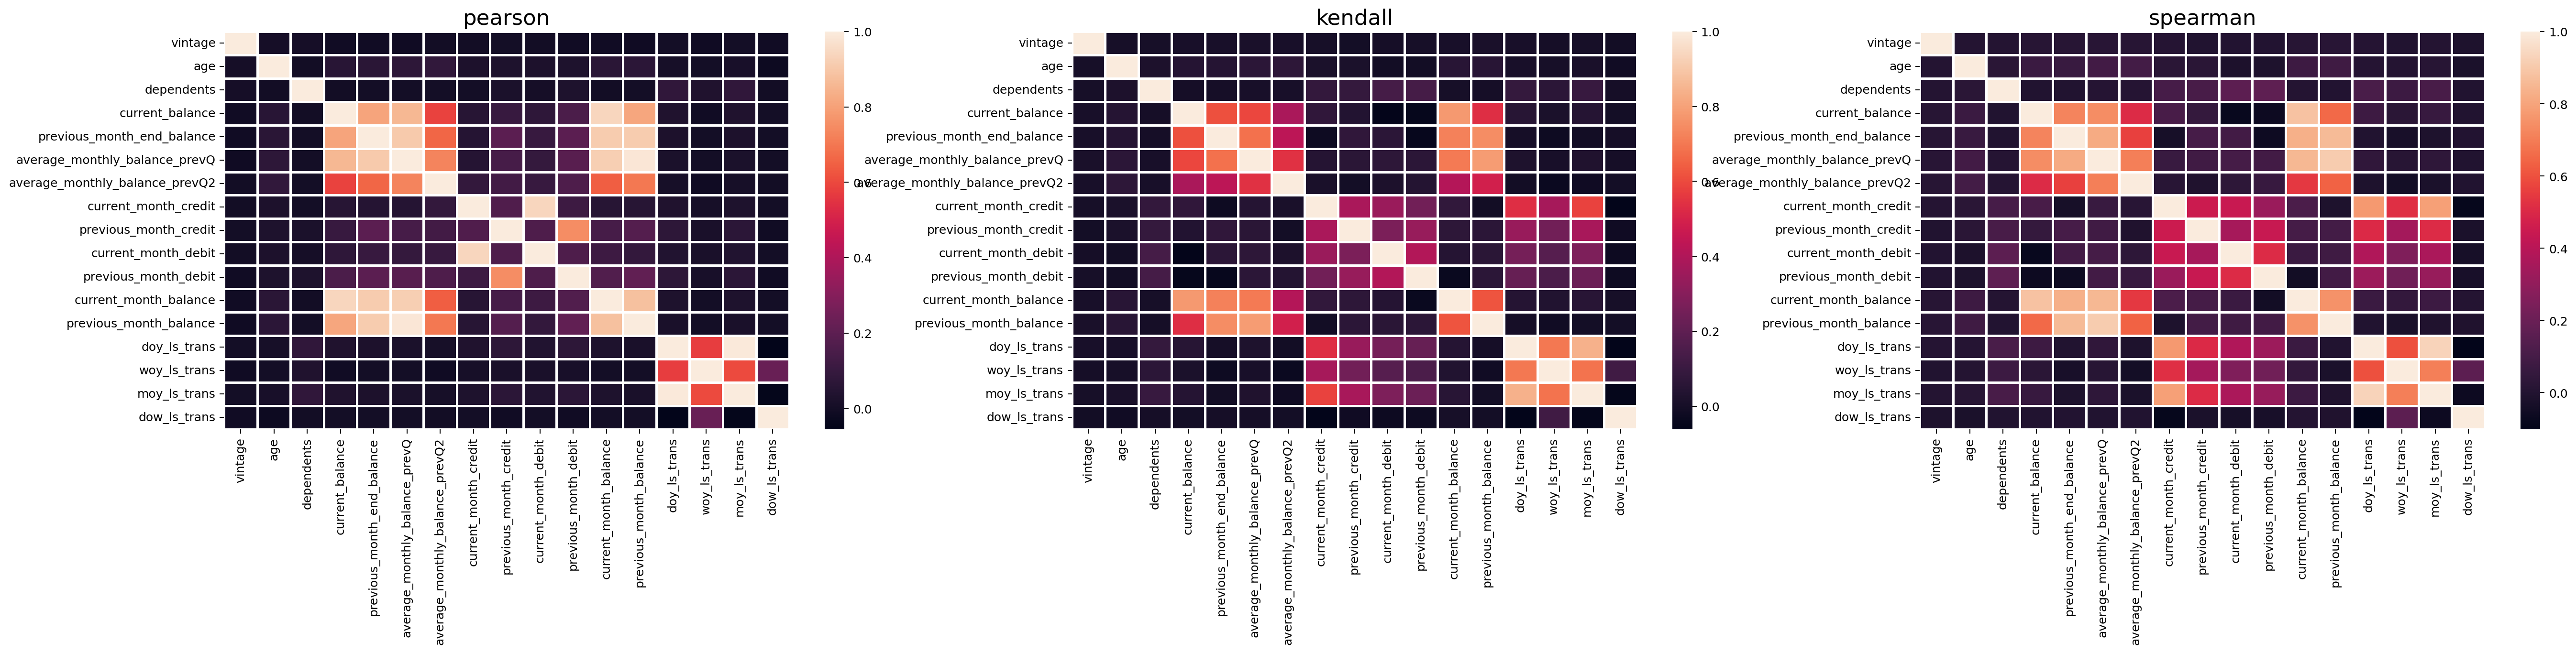

In [176]:
#There are three different models to find out correlation
model = ['pearson','kendall','spearman']
plt.figure(figsize=(36,6), dpi=180)
for j,i in enumerate(model):
    plt.subplot(1,len(model),j+1)
    numeric = NUMERICAL.dropna().corr(method = i)
    sns.heatmap(numeric,linewidth = 2)
    plt.title(i,fontsize = 18)

## SCATTER PLOT

In [177]:
# Group the data according to transaction adn balance

transactions = ['current_month_credit','current_month_debit','previous_month_credit','previous_month_debit']
balance = ['previous_month_end_balance','previous_month_balance','current_balance','current_month_balance']

In [178]:
#If we plot Plot PAIRPLOT, that gives an error due to outlier
#So, Apply log for every value then plot the graph

var = []
var.extend(previous_month)
var.extend(current_month)
var.extend(previous_quarters)
var
data_var = data[var]

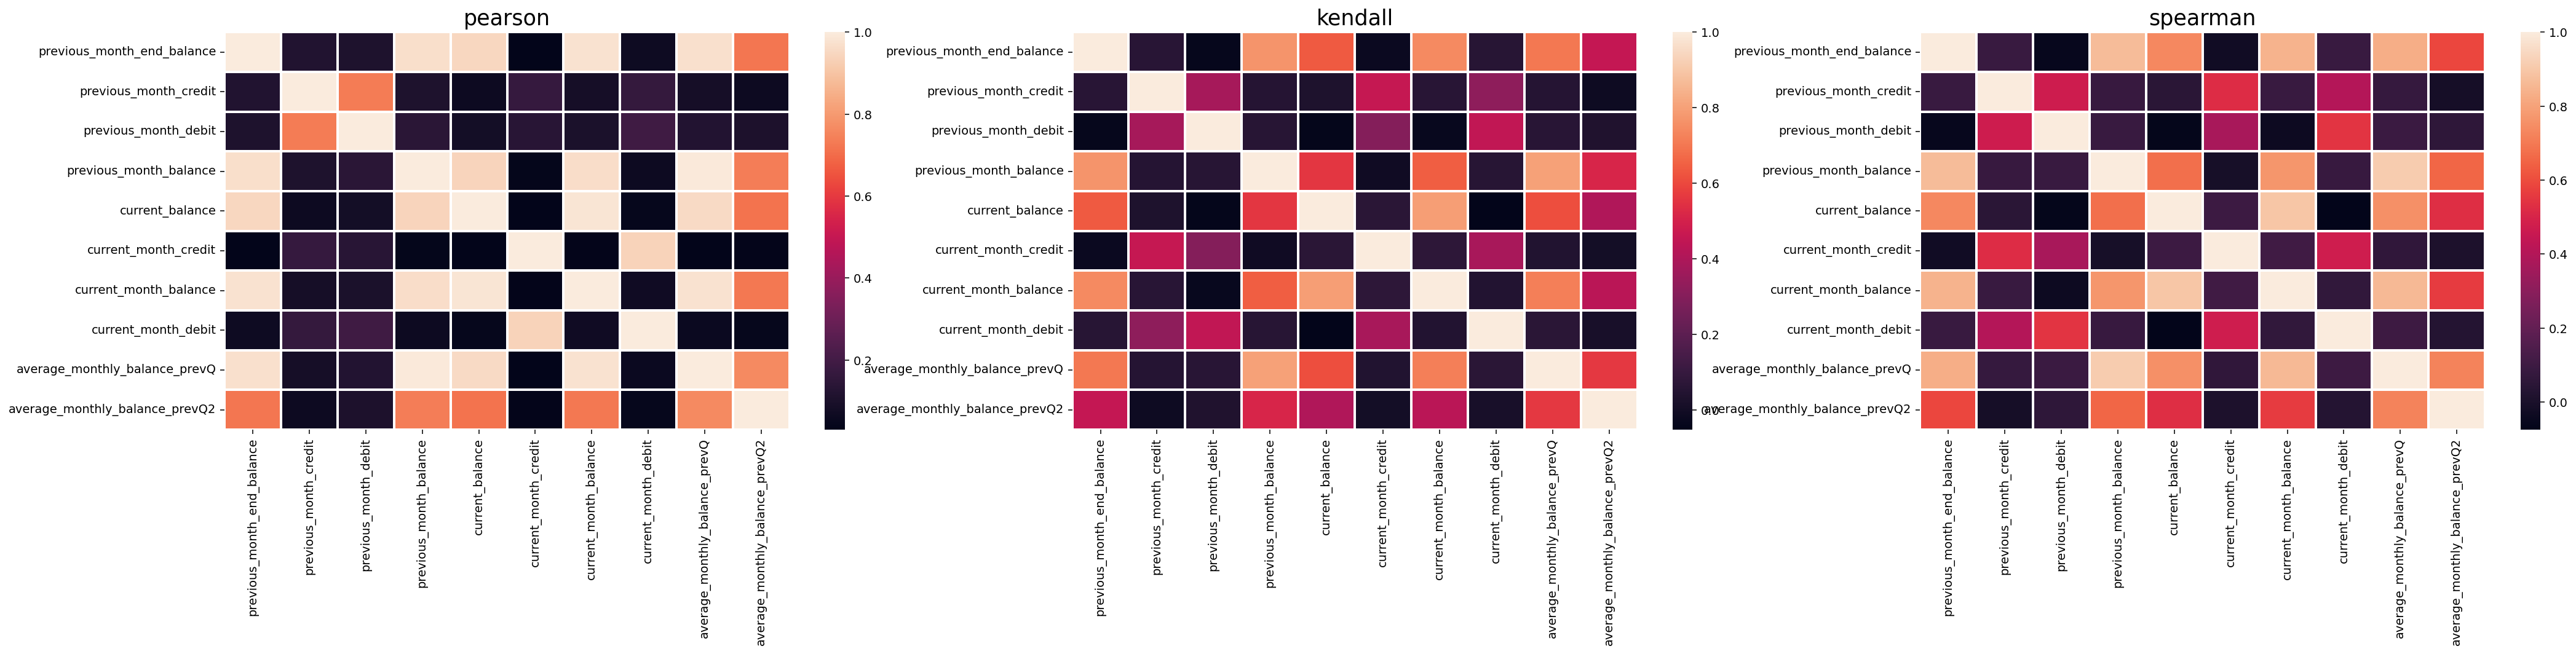

In [179]:
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = NUMERICAL[var].dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

In [180]:
#For applying log for each value
import numpy as np
for col in var:
    min_ = 1
    if NUMERICAL[col].min()<0:
        min_ = abs(NUMERICAL[col].min()) + 1
        
    NUMERICAL[col] = [i+min_ for i in NUMERICAL[col]]
    NUMERICAL[col] = NUMERICAL[col].map(lambda x: np.log(x))
    

<Figure size 896x672 with 0 Axes>

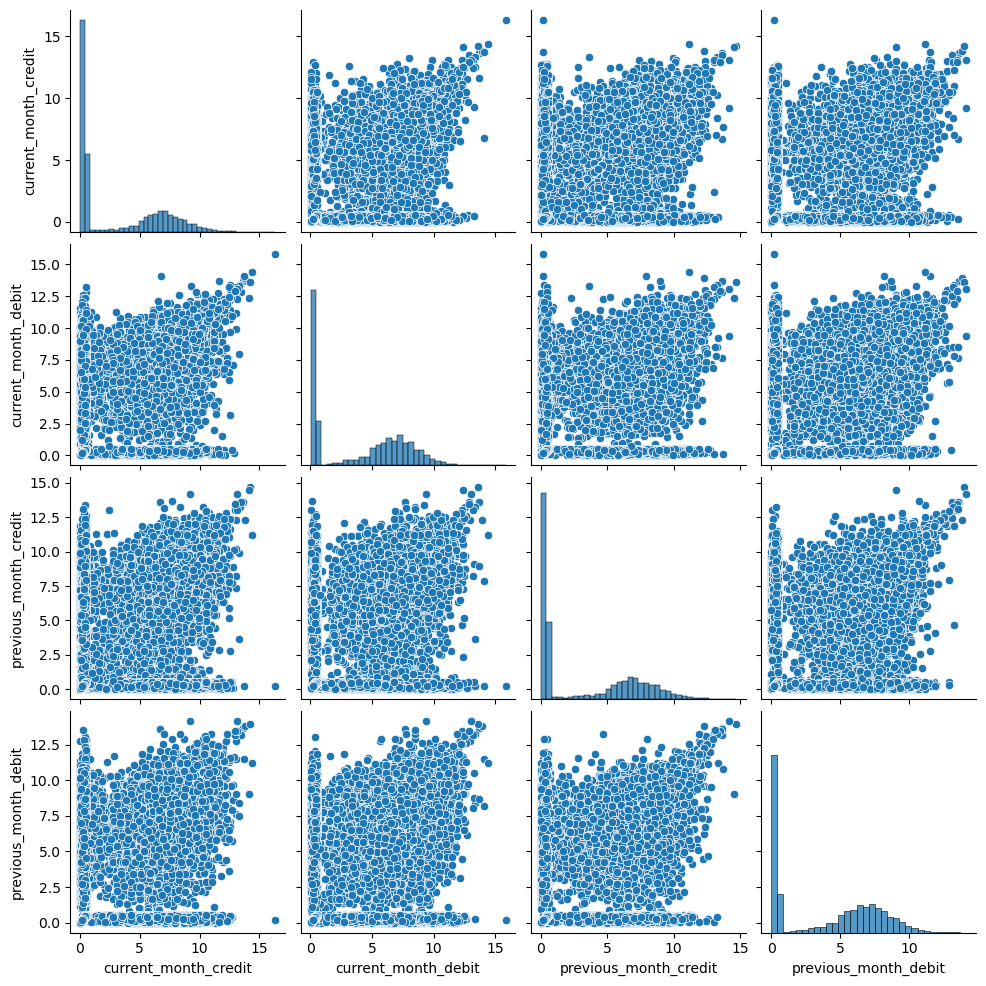

In [181]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(NUMERICAL[transactions])

<Figure size 896x672 with 0 Axes>

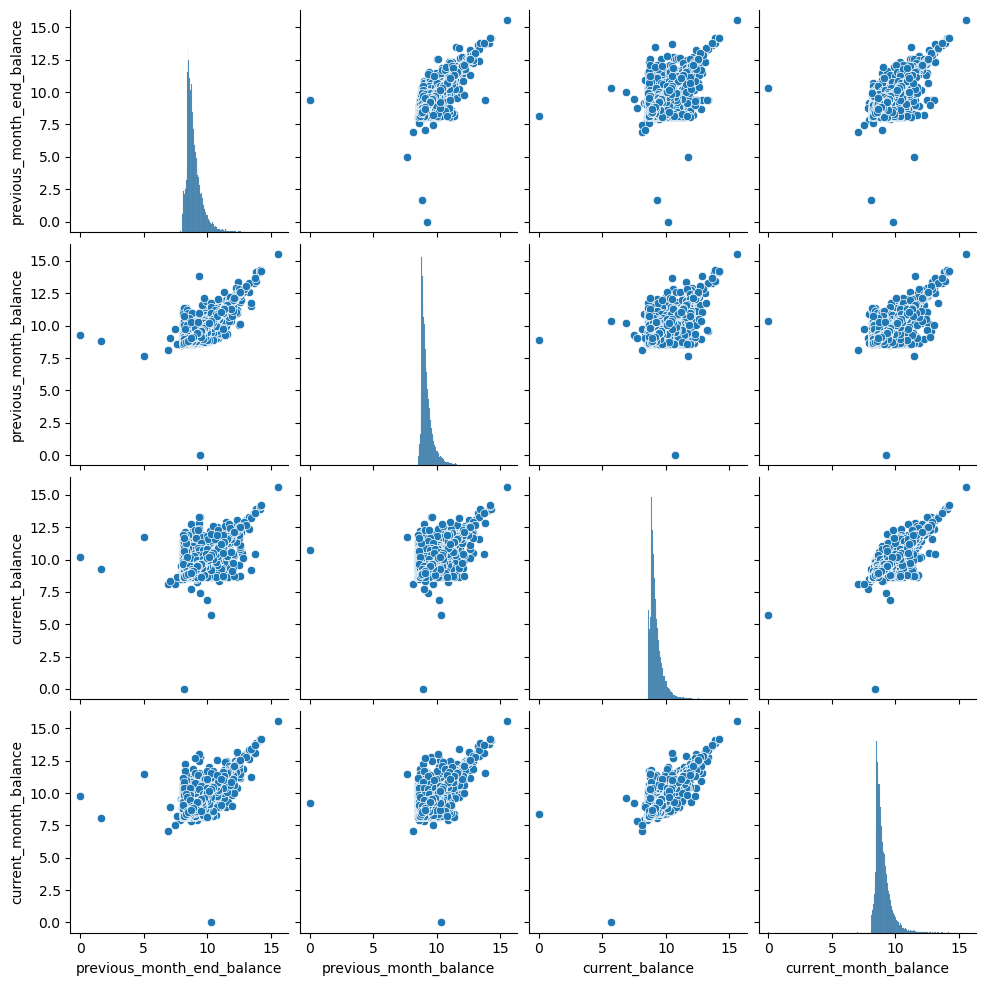

In [182]:
# scatter plot for balance variables
plt.figure(dpi=140)
sns.pairplot(NUMERICAL[balance])

<Axes: xlabel='average_monthly_balance_prevQ', ylabel='average_monthly_balance_prevQ2'>

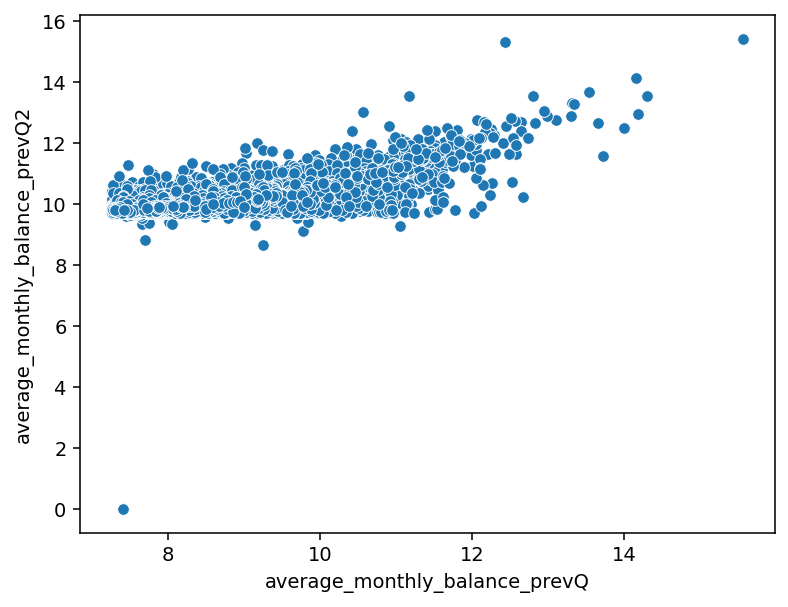

In [183]:
# previous quarters
plt.figure(dpi=140)
sns.scatterplot(x = NUMERICAL['average_monthly_balance_prevQ'],y = NUMERICAL['average_monthly_balance_prevQ2'])

In [184]:
#THESE CONCLUDES ALL HAS HIGH CORRELATION BETWEEN THEM (BALANCE , TRANSACTIONS , PREV_QUARTERS)

# MULTIVARIATE ANALYSIS

In [185]:
data.head()

vintage  age gender  dependents     occupation    city  \
0     2101   66   Male           0  self_employed   187.0   
1     2348   35   Male           0  self_employed     NaN   
2     2194   31   Male           0       salaried   146.0   
3     2329   90    NaN        <NA>  self_employed  1020.0   
4     1579   42   Male           2  self_employed  1494.0   

  customer_nw_category branch_code  current_balance  \
0                    2         755          1458.71   
1                    2        3214          5390.37   
2                    2          41          3913.16   
3                    2         582          2291.91   
4                    3         388           927.72   

   previous_month_end_balance  ...  previous_month_credit  \
0                     1458.71  ...                   0.20   
1                     8704.66  ...                   0.56   
2                     5815.29  ...                   0.61   
3                     2291.91  ...                   0.47   
4                     1401.72  ...                 714.61   

   current_month_debit  previous_month_debit  current_month_balance  \
0                 0.20                  0.20                1458.71   
1              5486.27                100.56                6496.78   
2              6046.73                259.23                5006.28   
3                 0.47               2143.33                2291.91   
4               588.62               1538.06                1157.15   

   previous_month_balance  churn  doy_ls_trans  woy_ls_trans moy_ls_trans  \
0                 1458.71      0         141.0          21.0          5.0   
1                 8787.61      0         305.0          44.0         11.0   
2                 5070.14      0           NaN           NaN          NaN   
3                 1669.79      1         218.0          32.0          8.0   
4                 1677.16      1         307.0          44.0         11.0   

   dow_ls_trans  
0           1.0  
1           4.0  
2           NaN  
3           1.0  
4           6.0  

[5 rows x 23 columns]

In [186]:
data.dtypes

vintage                              int64
age                                  int64
gender                            category
dependents                           Int64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
doy_ls_trans                       float64
woy_ls_trans                       float64
moy_ls_trans                       float64
dow_ls_trans                       float64
dtype: obje

In [187]:
##PIVOT TABLE

# Pandas doesnot support categorical datatype. So, convert them to suitable datatype

category_variables = data.columns[data.dtypes == 'category']
category_variables



Index(['gender', 'occupation', 'city', 'customer_nw_category', 'branch_code',
       'churn'],
      dtype='object')

In [188]:
data['gender'] = data['gender'].astype('object')
data['occupation'] = data['occupation'].astype('object')
data['city'] = data['city'].astype('float')
data['customer_nw_category'] = data['customer_nw_category'].astype('object')
data['branch_code'] = data['branch_code'].astype('float')
data['churn'] = data['churn'].astype('int')

In [189]:
data.dtypes

vintage                             int64
age                                 int64
gender                             object
dependents                          Int64
occupation                         object
city                              float64
customer_nw_category               object
branch_code                       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int32
doy_ls_trans                      float64
woy_ls_trans                      float64
moy_ls_trans                      float64
dow_ls_trans                      float64
dtype: object

In [190]:
data.pivot_table('churn', ['gender', 'occupation'], 'customer_nw_category', aggfunc='mean')*100

customer_nw_category           1          2          3
gender occupation                                     
Female company        100.000000   0.000000  66.666667
       retired         20.689655  11.219512  13.492063
       salaried        18.545455  14.849188  17.689016
       self_employed   18.111588  18.197035  18.920916
       student         10.404624  14.442413  15.034965
Male   company          0.000000   0.000000   0.000000
       retired         18.497110  14.251781  16.316640
       salaried        17.557252  16.410469  18.468702
       self_employed   22.832370  20.424978  21.465808
       student         16.969697  17.210145  18.208955

In [191]:
#Male who are Self-Employeed getting the high churning rate. (22% with 1 cust_nw_category , 20% with 2 , 21% with 3)


### **Lets use Gender , Age , Occupation for insights**

In [192]:
#Since Gender is a continuous variable - convert it to categorical by pivot table (Binning process)

age = pd.cut(data['age'] , [0,25,50,100])
#Now create Pivot table to get - How many MEN are churning in the age intervals

data.pivot_table('churn' , ['gender',age] , 'occupation' , aggfunc = 'sum')

occupation        company  retired  salaried  self_employed  student
gender age                                                          
Female (0, 25]          0        0         7             27      102
       (25, 50]         2        0       226            852       38
       (50, 100]        1       52        70            605        0
Male   (0, 25]          0        0        17             74      137
       (25, 50]         0        2       563           1107       47
       (50, 100]        0      251       264            698        0

In [193]:
#Male's who are self-employeed and age in between (25,50) are churning (1107) more then female (852) 

In [194]:
##Draw insights from two continuous Variables (Current_balance , Age) and two Categorical Variables (Gender , Occupation)
balance = pd.cut(data['current_balance'], 3)

data.pivot_table('churn' , ['gender',age] , [balance,'occupation'] , aggfunc = 'sum')

current_balance  (-11415.368, 1964965.37]                                 \
occupation                        company retired salaried self_employed   
gender age                                                                 
Female (0, 25]                          0       0        7            27   
       (25, 50]                         2       0      226           852   
       (50, 100]                        1      52       70           605   
Male   (0, 25]                          0       0       17            74   
       (25, 50]                         0       2      563          1107   
       (50, 100]                        0     251      264           698   

current_balance          (1964965.37, 3935434.7]                   \
occupation       student                 company retired salaried   
gender age                                                          
Female (0, 25]       102                       0       0        0   
       (25, 50]       38                       0       0        0   
       (50, 100]       0                       0       0        0   
Male   (0, 25]       137                       0       0        0   
       (25, 50]       47                       0       0        0   
       (50, 100]       0                       0       0        0   

current_balance                        (3935434.7, 5905904.03]          \
occupation       self_employed student                 company retired   
gender age                                                               
Female (0, 25]               0       0                       0       0   
       (25, 50]              0       0                       0       0   
       (50, 100]             0       0                       0       0   
Male   (0, 25]               0       0                       0       0   
       (25, 50]              0       0                       0       0   
       (50, 100]             0       0                       0       0   

current_balance                                  
occupation       salaried self_employed student  
gender age                                       
Female (0, 25]          0             0       0  
       (25, 50]         0             0       0  
       (50, 100]        0             0       0  
Male   (0, 25]          0             0       0  
       (25, 50]         0             0       0  
       (50, 100]        0             0       0

In [195]:
balance = pd.qcut(data['current_balance'], 3)
data.pivot_table('churn', ['gender', age], [balance, 'occupation'], aggfunc='mean')*100

current_balance  (-5503.961, 2202.177]                                      \
occupation                     company    retired   salaried self_employed   
gender age                                                                   
Female (0, 25]                     NaN        NaN  26.315789     38.596491   
       (25, 50]                   50.0   0.000000  32.300885     33.677419   
       (50, 100]                 100.0  28.333333  35.156250     30.642361   
Male   (0, 25]                     0.0        NaN  35.294118     52.000000   
       (25, 50]                    0.0   0.000000  33.367243     38.901345   
       (50, 100]                   0.0  29.489603  32.119914     33.060854   

current_balance             (2202.177, 5114.317]                        \
occupation          student              company    retired   salaried   
gender age                                                               
Female (0, 25]    21.262458                  NaN        NaN   5.882353   
       (25, 50]   25.974026                100.0   0.000000   9.826590   
       (50, 100]   0.000000                  NaN   5.633803  11.200000   
Male   (0, 25]    28.189911                  NaN        NaN  14.285714   
       (25, 50]   44.117647                  0.0  16.666667  11.889401   
       (50, 100]        NaN                  0.0   6.927176  10.766046   

current_balance                           (5114.317, 5905904.03]             \
occupation       self_employed    student                company    retired   
gender age                                                                    
Female (0, 25]       10.810811   7.167235                    NaN        NaN   
       (25, 50]      10.891720   6.862745                    0.0        NaN   
       (50, 100]     11.052166        NaN                    0.0   8.196721   
Male   (0, 25]       14.117647   6.493506                    NaN        NaN   
       (25, 50]      13.214740  12.345679                    0.0  20.000000   
       (50, 100]     12.565905        NaN                    0.0  10.606061   

current_balance                                       
occupation         salaried self_employed    student  
gender age                                            
Female (0, 25]    12.500000      3.333333  10.240964  
       (25, 50]    6.697460     11.990950  16.666667  
       (50, 100]   8.029197     10.583333        NaN  
Male   (0, 25]     5.263158     16.949153  12.021858  
       (25, 50]    9.005947     12.058824   9.459459  
       (50, 100]  10.544218     13.941606   0.000000

# BOX PLOT

In [196]:
#Boxplot with one continuous variable (age) and two continuous variable (occupation , churn)

def Grouped_Box_Plot(data, cont, cat1, cat2):
    # boxplot
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v')
    plt.title('Boxplot')

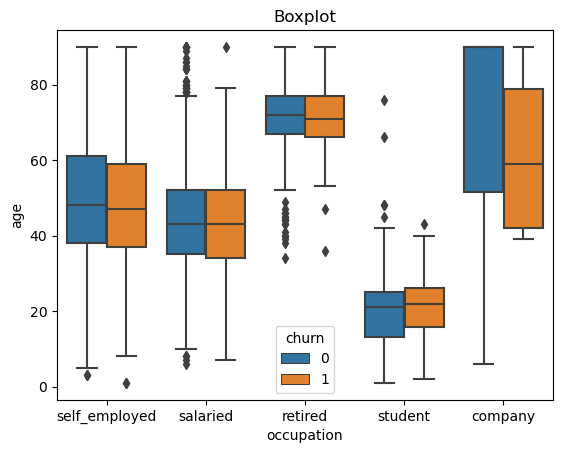

In [197]:
Grouped_Box_Plot(data,'age','occupation','churn')

In [198]:
#People who are retired early are not churning
#Students who have high age are not churning
#Salaried person with high age are not churning

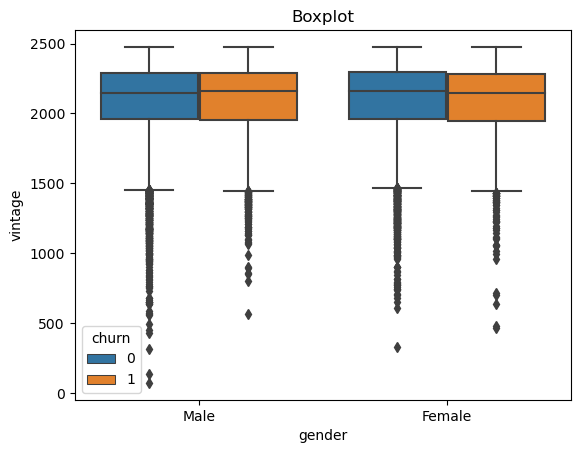

In [199]:
Grouped_Box_Plot(data,'vintage','gender', 'churn')

In [200]:
#Both Male and Female are having similar churnings. No insights

# PAIR PLOT

In [201]:
#Lets check relation between Transaction variables and churn. Before that convert values to log , because its difficult to plot with outliers

In [202]:
balance_cols = ['current_balance','previous_month_end_balance',
                'current_month_balance', 'previous_month_balance']

data1 = pd.DataFrame()

for i in balance_cols:
    data1[str('log_') + i] = np.log(data[i] + 6000)
    
log_balance_cols = data1.columns
log_balance_cols

Index(['log_current_balance', 'log_previous_month_end_balance',
       'log_current_month_balance', 'log_previous_month_balance'],
      dtype='object')

In [203]:
data1['churn'] = data['churn']
data1.head()

log_current_balance  log_previous_month_end_balance  \
0             8.917138                        8.917138   
1             9.340524                        9.595920   
2             9.201618                        9.377150   
3             9.023036                        9.023036   
4             8.843286                        8.909468   

   log_current_month_balance  log_previous_month_balance  churn  
0                   8.917138                    8.917138      0  
1                   9.433226                    9.601545      0  
2                   9.306221                    9.312007      0  
3                   9.023036                    8.945045      1  
4                   8.875867                    8.946005      1

In [204]:
data[balance_cols].head()

current_balance  previous_month_end_balance  current_month_balance  \
0          1458.71                     1458.71                1458.71   
1          5390.37                     8704.66                6496.78   
2          3913.16                     5815.29                5006.28   
3          2291.91                     2291.91                2291.91   
4           927.72                     1401.72                1157.15   

   previous_month_balance  
0                 1458.71  
1                 8787.61  
2                 5070.14  
3                 1669.79  
4                 1677.16

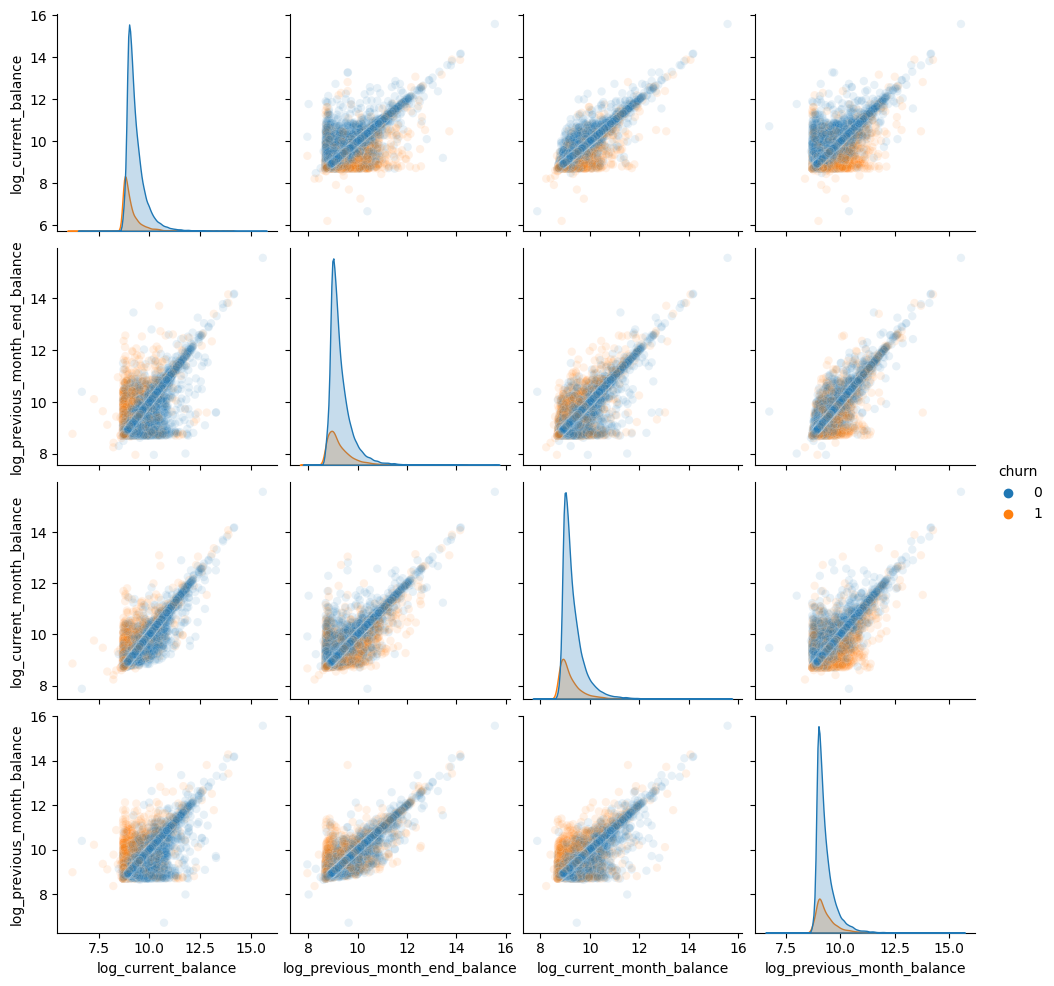

In [205]:
sns.pairplot(data1,vars=log_balance_cols,hue ='churn',plot_kws={'alpha':0.1})
plt.show()

In [206]:
#All has high Co-relation between them.

In [207]:
#Repeat the same process with Total debits and credits with previous and current months

cr_dr_cols = ['current_month_credit','previous_month_credit', 
              'current_month_debit', 'previous_month_debit']

data2 = pd.DataFrame()

for i in cr_dr_cols:
    data2[str('log_')+ i] = np.log(data[i])

log_dr_cr_cols = data2.columns

In [208]:
data2.head()

log_current_month_credit  log_previous_month_credit  \
0                 -1.609438                  -1.609438   
1                 -0.579818                  -0.579818   
2                 -0.494296                  -0.494296   
3                 -0.755023                  -0.755023   
4                 -1.108663                   6.571737   

   log_current_month_debit  log_previous_month_debit  
0                -1.609438                 -1.609438  
1                 8.610004                  4.610755  
2                 8.707273                  5.557716  
3                -0.755023                  7.670116  
4                 6.377781                  7.338277

In [209]:
data2['churn'] = data['churn']

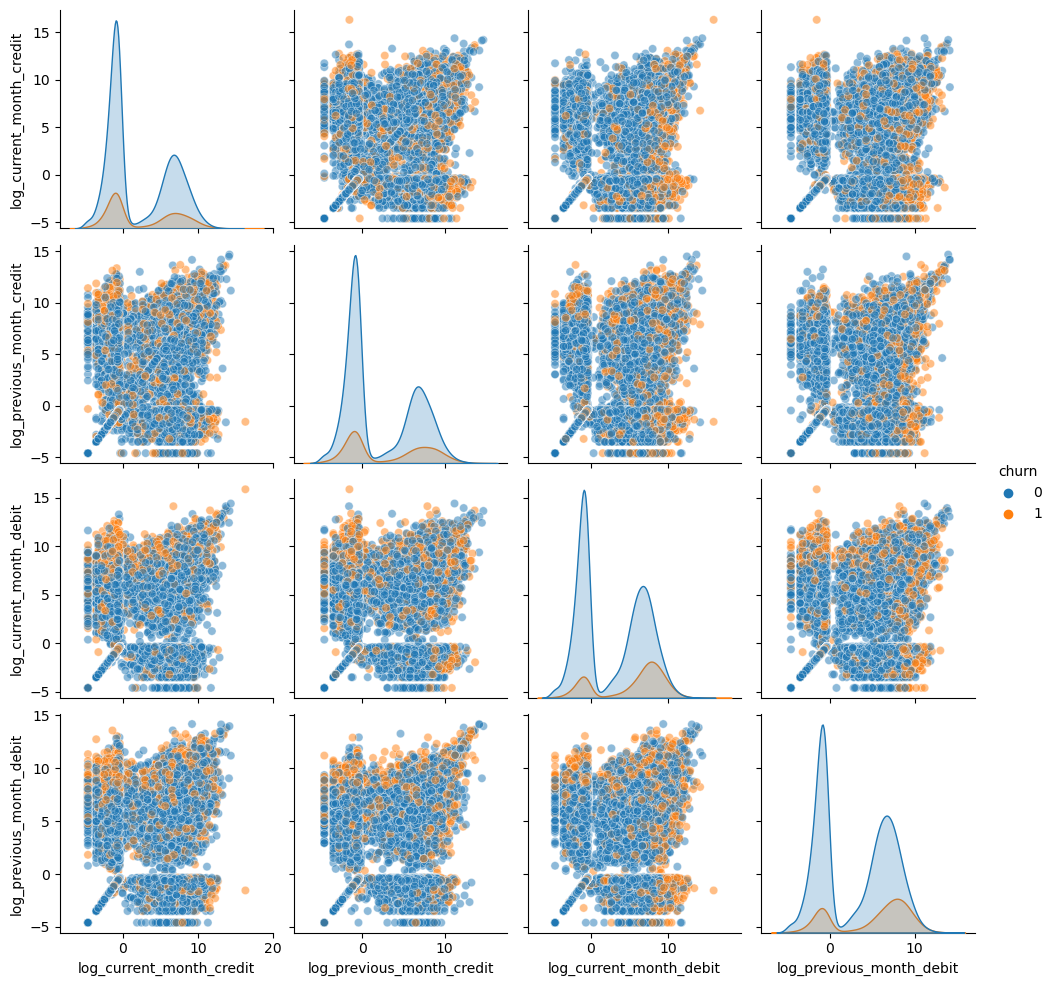

In [210]:
sns.pairplot(data2,vars=log_dr_cr_cols, hue = 'churn',plot_kws={'alpha':0.5})
plt.show()

# ENCODING

In [211]:
data_encoded = pd.get_dummies(data , drop_first = True)
data_encoded.head(10)

C:\Users\mgowt\AppData\Local\Temp\ipykernel_8104\603290094.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data_encoded = pd.get_dummies(data , drop_first = True)


vintage  age  dependents    city  branch_code  current_balance  \
0     2101   66           0   187.0        755.0          1458.71   
1     2348   35           0     NaN       3214.0          5390.37   
2     2194   31           0   146.0         41.0          3913.16   
3     2329   90        <NA>  1020.0        582.0          2291.91   
4     1579   42           2  1494.0        388.0           927.72   
5     1923   42           0  1096.0       1666.0         15202.20   
6     2048   72           0  1020.0          1.0          7006.93   
7     2009   46           0   623.0        317.0         10096.58   
8     2053   31           0  1096.0       4110.0          1355.86   
9     2295   40           3  1020.0         38.0          4957.95   

   previous_month_end_balance  average_monthly_balance_prevQ  \
0                     1458.71                        1458.71   
1                     8704.66                        7799.26   
2                     5815.29                        4910.17   
3                     2291.91                        2084.54   
4                     1401.72                        1643.31   
5                    16059.34                       15211.29   
6                     7714.19                        7859.74   
7                     8519.53                        6511.82   
8                     1355.86                        1702.44   
9                     4244.38                        2168.53   

   average_monthly_balance_prevQ2  current_month_credit  ...  woy_ls_trans  \
0                         1449.07                  0.20  ...          21.0   
1                        12419.41                  0.56  ...          44.0   
2                         2815.94                  0.61  ...           NaN   
3                         1006.54                  0.47  ...          32.0   
4                         1871.12                  0.33  ...          44.0   
5                        13798.82                  0.36  ...          44.0   
6                        11232.37                  0.64  ...          39.0   
7                        16314.17                  0.27  ...          28.0   
8                         1126.13                714.51  ...          50.0   
9                         1864.33               6912.29  ...           1.0   

   moy_ls_trans  dow_ls_trans  gender_Male  occupation_retired  \
0           5.0           1.0            1                   0   
1          11.0           4.0            1                   0   
2           NaN           NaN            1                   0   
3           8.0           1.0            0                   0   
4          11.0           6.0            1                   0   
5          11.0           4.0            0                   0   
6           9.0           1.0            1                   1   
7           7.0           4.0            1                   0   
8          12.0           3.0            1                   0   
9          12.0           1.0            1                   0   

   occupation_salaried  occupation_self_employed  occupation_student  \
0                    0                         1                   0   
1                    0                         1                   0   
2                    1                         0                   0   
3                    0                         1                   0   
4                    0                         1                   0   
5                    0                         1                   0   
6                    0                         0                   0   
7                    0                         1                   0   
8                    1                         0                   0   
9                    0                         1                   0   

   customer_nw_category_2  customer_nw_category_3  
0                       1                       0  
1                       1                       0  
2  

# Missing Values

In [212]:
data.isnull().sum()

vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
doy_ls_trans                      3223
woy_ls_trans                      3223
moy_ls_trans                      3223
dow_ls_trans                      3223
dtype: int64

In [213]:
def fill_mode(df):
    for column in df.columns:
        df[column].fillna(df[column].mode()[0], inplace=True)
        
fill_mode(data_encoded)
data_encoded.head(10)

vintage  age  dependents    city  branch_code  current_balance  \
0     2101   66           0   187.0        755.0          1458.71   
1     2348   35           0  1020.0       3214.0          5390.37   
2     2194   31           0   146.0         41.0          3913.16   
3     2329   90           0  1020.0        582.0          2291.91   
4     1579   42           2  1494.0        388.0           927.72   
5     1923   42           0  1096.0       1666.0         15202.20   
6     2048   72           0  1020.0          1.0          7006.93   
7     2009   46           0   623.0        317.0         10096.58   
8     2053   31           0  1096.0       4110.0          1355.86   
9     2295   40           3  1020.0         38.0          4957.95   

   previous_month_end_balance  average_monthly_balance_prevQ  \
0                     1458.71                        1458.71   
1                     8704.66                        7799.26   
2                     5815.29                        4910.17   
3                     2291.91                        2084.54   
4                     1401.72                        1643.31   
5                    16059.34                       15211.29   
6                     7714.19                        7859.74   
7                     8519.53                        6511.82   
8                     1355.86                        1702.44   
9                     4244.38                        2168.53   

   average_monthly_balance_prevQ2  current_month_credit  ...  woy_ls_trans  \
0                         1449.07                  0.20  ...          21.0   
1                        12419.41                  0.56  ...          44.0   
2                         2815.94                  0.61  ...          52.0   
3                         1006.54                  0.47  ...          32.0   
4                         1871.12                  0.33  ...          44.0   
5                        13798.82                  0.36  ...          44.0   
6                        11232.37                  0.64  ...          39.0   
7                        16314.17                  0.27  ...          28.0   
8                         1126.13                714.51  ...          50.0   
9                         1864.33               6912.29  ...           1.0   

   moy_ls_trans  dow_ls_trans  gender_Male  occupation_retired  \
0           5.0           1.0            1                   0   
1          11.0           4.0            1                   0   
2          12.0           1.0            1                   0   
3           8.0           1.0            0                   0   
4          11.0           6.0            1                   0   
5          11.0           4.0            0                   0   
6           9.0           1.0            1                   1   
7           7.0           4.0            1                   0   
8          12.0           3.0            1                   0   
9          12.0           1.0            1                   0   

   occupation_salaried  occupation_self_employed  occupation_student  \
0                    0                         1                   0   
1                    0                         1                   0   
2                    1                         0                   0   
3                    0                         1                   0   
4                    0                         1                   0   
5                    0                         1                   0   
6                    0                         0                   0   
7                    0                         1                   0   
8                    1                         0                   0   
9                    0                         1                   0   

   customer_nw_category_2  customer_nw_category_3  
0                       1                       0  
1                       1                       0  
2  

# DATA HAS BEEN CLEANED , NOW SPLIT THE DATA

In [215]:
X = data_encoded.drop(columns='churn',axis=1)
y = data_encoded['churn']


In [216]:
X.shape,y.shape

((28382, 26), (28382,))

In [217]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((22705, 26), (5677, 26), (22705,), (5677,))

## Normalising the data

In [218]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [221]:
cols_X = X_train.columns
cols_X

Index(['vintage', 'age', 'dependents', 'city', 'branch_code',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'doy_ls_trans', 'woy_ls_trans',
       'moy_ls_trans', 'dow_ls_trans', 'gender_Male', 'occupation_retired',
       'occupation_salaried', 'occupation_self_employed', 'occupation_student',
       'customer_nw_category_2', 'customer_nw_category_3'],
      dtype='object')

In [222]:
X_train_sc = sc.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc,columns=cols_X)
X_train_sc

vintage       age  dependents      city  branch_code  current_balance  \
0      0.873491  0.764045    0.000000  0.322013     0.031793         0.002178   
1      0.863088  0.404494    0.000000  0.659794     0.682702         0.001471   
2      0.774032  0.685393    0.000000  0.618557     0.016315         0.004810   
3      0.908448  0.483146    0.000000  0.248029     0.081782         0.001630   
4      0.944653  0.449438    0.000000  0.455428     0.263962         0.006565   
...         ...       ...         ...       ...          ...              ...   
22700  0.908448  0.573034    0.000000  0.618557     0.017779         0.002426   
22701  0.628797  0.764045    0.000000  0.837477     0.460364         0.001493   
22702  0.972118  0.584270    0.000000  0.377805     0.004183         0.007949   
22703  0.726592  0.674157    0.038462  0.202547     0.016942         0.001350   
22704  0.861423  0.269663    0.000000  0.297756     0.306421         0.001175   

       previous_month_end_balance  average_monthly_balance_prevQ  \
0                        0.001825                       0.000991   
1                        0.001178                       0.000408   
2                        0.002962                       0.002616   
3                        0.001281                       0.000501   
4                        0.004205                       0.003544   
...                           ...                            ...   
22700                    0.001253                       0.000279   
22701                    0.001127                       0.000357   
22702                    0.019213                       0.013904   
22703                    0.001303                       0.000407   
22704                    0.000799                       0.000009   

       average_monthly_balance_prevQ2  current_month_credit  ...  \
0                            0.003437          2.619674e-05  ...   
1                            0.002857          2.363518e-08  ...   
2                            0.003550          4.075080e-03  ...   
3                            0.003012          1.630012e-09  ...   
4                            0.006819          1.010651e-03  ...   
...                               ...                   ...  ...   
22700                        0.002794          5.079363e-04  ...   
22701                        0.002923          4.482534e-08  ...   
22702                        0.012662          5.821997e-04  ...   
22703                        0.002849          2.331081e-05  ...   
22704                        0.002426          4.482534e-08  ...   

       woy_ls_trans  moy_ls_trans  dow_ls_trans  gender_Male  \
0          0.960784      1.000000      0.166667          0.0   
1          0.745098      0.727273      0.833333          1.0   
2          1.000000      1.000000      0.833333          1.0   
3          0.568627      0.545455      0.166667          1.0   
4          1.000000      1.000000      0.833333          1.0   
...             ...           ...           ...          ...   
22700      0.000000      1.000000      0.166667          0.0   
22701      0.568627      0.545455      0.833333          1.0   
22702      0.941176      1.000000      1.000000          0.0   
22703      0.960784      1.000000      0.333333          0.0   
22704      1.000000      1.000000      0.166667          1.0   

       occupation_retired  occupation_salaried  occupation_self_employed  \
0                     0.0                  0.0                       1.0   
1                     0.0                  0.0                       1.0   
2                     0.0                  0.0                       1.0   
3                     0.0                  1.0                       0.0   
4                     0.0                  0.0                       1.0   
...                   ...                  ...                       ...   
22700                 0.0                  1.0                       0.0   
22701                 0.

In [223]:
X_test_sc = sc.fit_transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc , columns=cols_X)
X_test_sc

vintage       age  dependents      city  branch_code  current_balance  \
0     0.897128  0.719101        0.00  0.618932     0.000845         0.004627   
1     0.752679  0.505618        0.00  0.688714     0.322424         0.027408   
2     0.870553  0.528090        0.00  0.556432     0.402872         0.011048   
3     0.945564  0.337079        0.00  0.925364     0.171664         0.007694   
4     0.876982  0.707865        0.00  0.952670     0.473184         0.011040   
...        ...       ...         ...       ...          ...              ...   
5672  0.903558  1.000000        0.00  0.899272     0.491976         0.008185   
5673  0.907844  0.280899        0.00  0.378034     0.076858         0.007410   
5674  0.985855  0.561798        0.00  0.665049     0.225084         0.003377   
5675  0.738963  0.460674        0.00  0.697816     0.007179         0.003968   
5676  0.981997  0.393258        0.08  0.412621     0.119088         0.003611   

      previous_month_end_balance  average_monthly_balance_prevQ  \
0                       0.005335                       0.000780   
1                       0.003123                       0.000095   
2                       0.011758                       0.006193   
3                       0.008401                       0.003365   
4                       0.011749                       0.006187   
...                          ...                            ...   
5672                    0.008894                       0.003780   
5673                    0.003709                       0.002856   
5674                    0.004336                       0.000031   
5675                    0.005246                       0.000567   
5676                    0.004353                       0.000181   

      average_monthly_balance_prevQ2  current_month_credit  ...  woy_ls_trans  \
0                           0.039296          3.975997e-07  ...      1.000000   
1                           0.035641          1.549157e-03  ...      0.941176   
2                           0.050986          1.156654e-07  ...      0.431373   
3                           0.046315          4.192870e-07  ...      1.000000   
4                           0.053464          3.108507e-07  ...      0.450980   
...                              ...                   ...  ...           ...   
5672                        0.047375          2.313307e-07  ...      0.196078   
5673                        0.066782          4.554324e-07  ...      0.352941   
5674                        0.038691          4.651844e-04  ...      0.000000   
5675                        0.038199          1.373526e-07  ...      0.745098   
5676                        0.040179          4.698906e-07  ...      0.686275   

      moy_ls_trans  dow_ls_trans  gender_Male  occupation_retired  \
0         1.000000      0.166667          0.0                 0.0   
1         1.000000      0.166667          1.0                 0.0   
2         0.454545      0.166667          0.0                 0.0   
3         1.000000      0.166667          0.0                 0.0   
4         0.454545      0.666667          0.0                 0.0   
...            ...           ...          ...                 ...   
5672      0.181818      1.000000          1.0                 0.0   
5673      0.363636      0.166667          0.0                 0.0   
5674      1.000000      0.166667          1.0                 0.0   
5675      0.727273      0.833333          1.0                 0.0   
5676      0.727273      0.500000          1.0                 0.0   

      occupation_salaried  occupation_self_employed  occupation_student  \
0                     0.0                       1.0                 0.0   
1                     0.0                       1.0                 0.0   
2                     0.0                       1.0                 0.0   
3                     0.0                       0.0                 1.0   
4                     0.0                       1.0             

# BUILDING MODEL

In [224]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(X_train_sc,y_train)

C:\Users\mgowt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [226]:
y_pred = log_reg.predict(X_test_sc)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [228]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.8175092478421702

In [ ]:
#By Hyper-Parameter tuning we get better score